<a href="https://colab.research.google.com/github/Alaalhumaidan/PhD/blob/main/ViViT22May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import librosa
import pickle
import librosa.display
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from collections import defaultdict
import re
import soundfile as sf
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import Audio
import numpy as np
import math
from collections import Counter
import json
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten,TimeDistributed,Input,BatchNormalization,Dropout, Activation
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, TimeDistributed
from keras.callbacks import Callback
from keras.utils import to_categorical
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import LabelEncoder


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.models import load_model, Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

###Prepare data

In [ ]:
with open('/content/drive/MyDrive/2HAR/tensor_data_and_labels_normal_balanced.pkl', 'rb') as f:
    tensor_data_and_labels_white_normal_balanced_loaded = pickle.load(f)
normal_data_balanced_loaded, normal_label_balanced_loaded = tensor_data_and_labels_white_normal_balanced_loaded
print((normal_data_balanced_loaded[0]))
print((normal_label_balanced_loaded[0]))

[-0.00025813 -0.0002904  -0.00027965 ...  0.00052702  0.00049476
  0.00047325]
[{'activity': 'silence', 'weight': 0.20034013605442177, 'time_range': (2.2, 2.2801360544217686), 'windowpath': 'Series3_SM36'}, {'activity': 'drop spoon', 'weight': 0.7996598639455782, 'time_range': (2.2801360544217686, 2.6), 'windowpath': 'Series3_SM36'}]


In [ ]:
# Check the count of elements in normal_data_balanced_loaded and normal_label_balanced_loaded
data_count = len(normal_data_balanced_loaded)
label_count = len(normal_label_balanced_loaded)

print(f"Count of elements in normal_data_balanced_loaded: {data_count}")
print(f"Count of elements in normal_label_balanced_loaded: {label_count}")

Count of elements in normal_data_balanced_loaded: 15363
Count of elements in normal_label_balanced_loaded: 15363


In [ ]:
with open('/content/drive/MyDrive/2HAR/tensor_data_and_labels_normal.pkl', 'rb') as f:
    tensor_data_and_labels_white_normal_balanced_loaded = pickle.load(f)
normal_data_loaded, normal_label_loaded = tensor_data_and_labels_white_normal_balanced_loaded
print((normal_label_loaded[0]))

{1: [{'activity': 'silence', 'weight': 1, 'time_range': (0.0, 0.4), 'windowpath': 'Series2_M8'}], 2: [{'activity': 'silence', 'weight': 1, 'time_range': (0.2, 0.6), 'windowpath': 'Series2_M8'}], 3: [{'activity': 'silence', 'weight': 1, 'time_range': (0.4, 0.8), 'windowpath': 'Series2_M8'}], 4: [{'activity': 'silence', 'weight': 0.9749433106575963, 'time_range': (0.6, 0.9899773242630385), 'windowpath': 'Series2_M8'}, {'activity': 'pickup/eat food', 'weight': 0.02505668934240363, 'time_range': (0.9899773242630385, 1.0), 'windowpath': 'Series2_M8'}], 5: [{'activity': 'silence', 'weight': 0.4749433106575964, 'time_range': (0.8, 0.9899773242630385), 'windowpath': 'Series2_M8'}, {'activity': 'pickup/eat food', 'weight': 0.5250566893424037, 'time_range': (0.9899773242630385, 1.2), 'windowpath': 'Series2_M8'}], 6: [{'activity': 'pickup/eat food', 'weight': 1, 'time_range': (1.0, 1.4), 'windowpath': 'Series2_M8'}], 7: [{'activity': 'pickup/eat food', 'weight': 1, 'time_range': (1.2, 1.6), 'wind

In [ ]:
# Check the count of elements in normal_data_balanced_loaded and normal_label_balanced_loaded
data_count = len(normal_data_loaded)
label_count = len(normal_label_loaded)

print(f"Count of elements in normal_data_balanced_loaded: {data_count}")
print(f"Count of elements in normal_label_balanced_loaded: {label_count}")

Count of elements in normal_data_balanced_loaded: 301
Count of elements in normal_label_balanced_loaded: 301


In [ ]:
def find_highest_suffix(output_folder, spec_filename):
    suffix = 1
    while True:
        # Generate the next output folder with an incremented suffix
        output_folder_with_suffix = f"{os.path.join(output_folder, spec_filename)}_{suffix}"

        # Check if the folder with the current suffix exists
        if not os.path.exists(output_folder_with_suffix):
            break

        # Increment the suffix number
        suffix += 1

    return suffix

def spectrogram(x,y, n_fft,hop_length, win_length,output_folder):
    X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
    Xdb = librosa.amplitude_to_db(abs(X))
    return Xdb

In [ ]:
n_fft = 2048  # FFT size
win_length = 1024  # Window size
hop_length = int(win_length/2)  # Hop length
output_folder="/content/drive/MyDrive/2HAR/Spectrogram"
# check_and_manage_folder(output_folder)
# audio_files = ["path/to/audio1.wav", "path/to/audio2.wav", ...]
spectrograms_all = []

for x,y in zip(normal_data_balanced_loaded,normal_label_balanced_loaded):
  spectrograms_all.append(spectrogram(x=x,y=y,n_fft=n_fft,hop_length=hop_length, win_length=win_length,output_folder="/content/drive/MyDrive/HAR/Spectrogram"))
  # spectrogram(x=x,y=y,n_fft=n_fft,hop_length=hop_length, win_length=win_length,output_folder="/content/drive/MyDrive/HAR/Spectrogram")

### Modify to Load (Clean) Test Data

In [ ]:
with open('/content/drive/MyDrive/2HAR/tensor_data_and_labels_normal_balanced.pkl', 'rb') as f:
    tensor_data_and_labels_normal_balanced_loaded = pickle.load(f)
normal_data_balanced_loaded, normal_label_balanced_loaded = tensor_data_and_labels_normal_balanced_loaded

In [ ]:
with open('/content/drive/MyDrive/2HAR/tensor_test_data_and_labels.pkl', 'rb') as f:
    tensor_test_data_and_labels_loaded = pickle.load(f)
test_data_loaded, test_label_loaded = tensor_test_data_and_labels_loaded

In [ ]:
def spectrogram(x,y, n_fft,hop_length, win_length):
    X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
    Xdb = librosa.amplitude_to_db(abs(X))
    print(Xdb.shape)
    return Xdb

In [ ]:
def create_spectrogram(n_fft,win_length,hop_length,normal_data_balanced_loaded,normal_label_balanced_loaded):
    spectrograms_all = []
    for x,y in zip(normal_data_balanced_loaded,normal_label_balanced_loaded):
      spectrograms_all.append(spectrogram(x=x,y=y,n_fft=n_fft,hop_length=hop_length, win_length=win_length))
    return spectrograms_all

In [ ]:
def create_labelencoder(normal_label_balanced_loaded):
    unique_activities = set()
    # Iterate over each dictionary in the list and add the "activity" key to the set
    for item in normal_label_balanced_loaded:
    # for item in label_test:
        for subitem in item:
          unique_activities.add(subitem['activity'])
    # Convert the set to a list
    unique_activities_list = list(unique_activities)
    print(unique_activities_list)
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    # Fit and transform class labels
    encoded_labels = label_encoder.fit_transform(unique_activities_list)
    print("Original labels:", unique_activities_list)
    print("Encoded labels:", encoded_labels)
    return encoded_labels,label_encoder

In [ ]:
def create_label_vector(labels, num_time_bins, audio_file_start_time, bin_duration,encoded_labels,label_encoder):
    label_vector = []

    # Iterate over each time bin
    for i in range(num_time_bins):
        bin_start_time = audio_file_start_time + i * bin_duration
        bin_end_time = bin_start_time + bin_duration

        # Find labels that overlap with the current time bin
        overlapping_labels = [label['activity'] for label in labels if label['time_range'][0] <= bin_end_time and label['time_range'][1] >= bin_start_time]

        # Assign a label to the time bin based on certain criteria
        if overlapping_labels:
            label = overlapping_labels[0]
            encoded_label = label_encoder.transform([label])[0]
            # For simplicity, let's just take the first overlapping label
            label_vector.append(encoded_label)
        else:
            # If no label overlaps with the time bin, assign a default label (e.g., "silence")
            label_vector.append(-1)  # You can adjust this as needed

    return label_vector

In [ ]:
n_fft = 2048  # FFT size
win_length = 1024  # Window size
hop_length = int(win_length/2)  # Hop length
num_time_bins = 35  # Number of time bins in the spectrogram
bin_duration = 0.4 / num_time_bins  # Duration of each time bin (400 ms divided by the number of time bins)
y_all=[]
spectrograms_all=create_spectrogram(n_fft,win_length,hop_length,normal_data_balanced_loaded,normal_label_balanced_loaded)
encoded_labels,label_encoder=create_labelencoder(normal_label_balanced_loaded)
for y in normal_label_balanced_loaded:
    audio_file_start_time = y[0]['time_range'][0]
    label_vector = create_label_vector(y, num_time_bins, audio_file_start_time, bin_duration,encoded_labels,label_encoder)
    y_all.append(label_vector)

Streaming output truncated to the last 5000 lines.
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(10

In [ ]:
num_spectrograms = len(spectrograms_all)
print(f"Number of spectrograms generated: {num_spectrograms}")

Number of spectrograms generated: 15363


In [ ]:
import numpy as np

def process_spectrograms(spectrograms, labels, label_to_check1, label_to_check2, threshold_factor=1):
    processed_spectrograms = []

    for spectrogram, label_sequence in zip(spectrograms, labels):
        # Calculate RMS energy for the current spectrogram
        rms_energy = np.sqrt(np.mean(np.square(spectrogram), axis=0))

        # Compute threshold for classifying frames as silent or low amplitude
        threshold = np.mean(rms_energy) * threshold_factor

        new_spectrogram = np.copy(spectrogram)

        if label_to_check1 in label_sequence or label_to_check2 in label_sequence:
            activity_indices = [i for i, label in enumerate(label_sequence) if label == label_to_check1 or label == label_to_check2]
            for i in activity_indices:
                if rms_energy[i] < threshold:
                    if i > 0:
                        new_spectrogram[i] = new_spectrogram[i - 1]
                        # print("hi")

        processed_spectrograms.append(new_spectrogram)

    return processed_spectrograms

# Set parameters:
label_to_check1 = 6 #walking
label_to_check2 = 4 #pick up/eat

# Process the spectrograms based on the defined criteria:
processed_spectrograms = process_spectrograms(spectrograms_all, y_all, label_to_check1, label_to_check2)

In [ ]:
n_fft = 2048  # FFT size
win_length = 1024  # Window size
hop_length = int(win_length/2)  # Hop length
num_time_bins = 35  # Number of time bins in the spectrogram
bin_duration = 0.4 / num_time_bins  # Duration of each time bin (400 ms divided by the number of time bins)
y_test_all=[]
spectrograms_test=create_spectrogram(n_fft,win_length,hop_length,test_data_loaded,test_label_loaded)
encoded_labels_test,label_encoder_test=create_labelencoder(test_label_loaded)
for y_t in test_label_loaded:
    audio_file_start_time_test = y_t[0]['time_range'][0]
    label_vector_test = create_label_vector(y_t, num_time_bins, audio_file_start_time_test, bin_duration,encoded_labels_test,label_encoder_test)
    y_test_all.append(label_vector_test)

(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)
(1025, 35)

In [ ]:
processed_spectrograms_test = process_spectrograms(spectrograms_test, y_test_all, label_to_check1, label_to_check2)

In [ ]:
X_test = np.array(processed_spectrograms_test)
y_test=np.array(y_test_all)
indices = np.random.permutation(len(X_test))
# Shuffle X_test and y_test using the same indices
X_test = X_test[indices]
y_test = y_test[indices]
X_test = X_test.reshape(-1, 35, 41, 25,1)
y_test=y_test.reshape(-1, 35, 1)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
print(X_test.shape)
print(y_test.shape)

(1878, 35, 41, 25, 1)
(1878, 35, 7)


In [ ]:
X_data = np.array(reshaped_spectrograms_all)

Y_data=np.array(y_all)
# Split data into training, validation, and testing sets
X_tr, X_val, y_tr, y_val = train_test_split(X_data, Y_data, test_size=0.10, shuffle= True, random_state=42)
# Assuming X_spectrograms shape is (num_audio_files, 35, 1025)
X_train = X_tr.reshape(-1, 35, 41, 25,1)
X_val = X_val.reshape(-1, 35, 41, 25,1)
Y_train=y_tr.reshape(-1, 35, 1)
Y_val=y_val.reshape(-1, 35, 1)
# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train, num_classes=7)
# Convert labels to one-hot encoding
Y_val = to_categorical(Y_val, num_classes=7)

ValueError: cannot reshape array of size 491904000 into shape (35,41,25,1)

In [ ]:
print((X_train.shape))
print((X_val.shape))
print((Y_train.shape))
print((Y_val.shape))

###print size

In [ ]:
# Assuming spectrograms_all contains the spectrograms
for i, spectrogram in enumerate(spectrograms_all):
    print(f"Spectrogram {i + 1} shape: {spectrogram.shape}")

Streaming output truncated to the last 5000 lines.
Spectrogram 10364 shape: (1025, 35)
Spectrogram 10365 shape: (1025, 35)
Spectrogram 10366 shape: (1025, 35)
Spectrogram 10367 shape: (1025, 35)
Spectrogram 10368 shape: (1025, 35)
Spectrogram 10369 shape: (1025, 35)
Spectrogram 10370 shape: (1025, 35)
Spectrogram 10371 shape: (1025, 35)
Spectrogram 10372 shape: (1025, 35)
Spectrogram 10373 shape: (1025, 35)
Spectrogram 10374 shape: (1025, 35)
Spectrogram 10375 shape: (1025, 35)
Spectrogram 10376 shape: (1025, 35)
Spectrogram 10377 shape: (1025, 35)
Spectrogram 10378 shape: (1025, 35)
Spectrogram 10379 shape: (1025, 35)
Spectrogram 10380 shape: (1025, 35)
Spectrogram 10381 shape: (1025, 35)
Spectrogram 10382 shape: (1025, 35)
Spectrogram 10383 shape: (1025, 35)
Spectrogram 10384 shape: (1025, 35)
Spectrogram 10385 shape: (1025, 35)
Spectrogram 10386 shape: (1025, 35)
Spectrogram 10387 shape: (1025, 35)
Spectrogram 10388 shape: (1025, 35)
Spectrogram 10389 shape: (1025, 35)
Spectrogram 1

In [ ]:
# Print the first few elements to understand the structure
for i, item in enumerate(spectrograms_all[:5]):
    print(f"Item {i + 1}: {type(item)}, {item.shape if isinstance(item, np.ndarray) else item}")

Item 1: <class 'numpy.ndarray'>, (1025, 35)
Item 2: <class 'numpy.ndarray'>, (1025, 35)
Item 3: <class 'numpy.ndarray'>, (1025, 35)
Item 4: <class 'numpy.ndarray'>, (1025, 35)
Item 5: <class 'numpy.ndarray'>, (1025, 35)


###Remove last row only

In [ ]:
import numpy as np

def remove_last_row(spectrogram):
    # Remove the last row from the spectrogram
    new_spectrogram = spectrogram[:-1, :]
    return new_spectrogram

# Apply the function to all spectrograms
new_spectrograms_all = [remove_last_row(spectrogram) for spectrogram in spectrograms_all]

# Print the new shape of each spectrogram
for i, spectrogram in enumerate(new_spectrograms_all):
    print(f"Spectrogram {i + 1} shape: {spectrogram.shape}")

Streaming output truncated to the last 5000 lines.
Spectrogram 10364 shape: (1024, 35)
Spectrogram 10365 shape: (1024, 35)
Spectrogram 10366 shape: (1024, 35)
Spectrogram 10367 shape: (1024, 35)
Spectrogram 10368 shape: (1024, 35)
Spectrogram 10369 shape: (1024, 35)
Spectrogram 10370 shape: (1024, 35)
Spectrogram 10371 shape: (1024, 35)
Spectrogram 10372 shape: (1024, 35)
Spectrogram 10373 shape: (1024, 35)
Spectrogram 10374 shape: (1024, 35)
Spectrogram 10375 shape: (1024, 35)
Spectrogram 10376 shape: (1024, 35)
Spectrogram 10377 shape: (1024, 35)
Spectrogram 10378 shape: (1024, 35)
Spectrogram 10379 shape: (1024, 35)
Spectrogram 10380 shape: (1024, 35)
Spectrogram 10381 shape: (1024, 35)
Spectrogram 10382 shape: (1024, 35)
Spectrogram 10383 shape: (1024, 35)
Spectrogram 10384 shape: (1024, 35)
Spectrogram 10385 shape: (1024, 35)
Spectrogram 10386 shape: (1024, 35)
Spectrogram 10387 shape: (1024, 35)
Spectrogram 10388 shape: (1024, 35)
Spectrogram 10389 shape: (1024, 35)
Spectrogram 1

###reshape

In [ ]:
import numpy as np

def reshape_spectrogram(spectrogram):
    # Verify that the spectrogram can be reshaped to (32, 32)
    if spectrogram.shape[0] != 1024:
        raise ValueError("Spectrogram's first dimension must be 1024 to reshape to (32, 32)")

    # Reshape the spectrogram from (1024, 35) to (32, 32, 35)
    reshaped_spectrogram = spectrogram.reshape(32, 32, 35)
    return reshaped_spectrogram

# Apply the reshaping function to all spectrograms
reshaped_spectrograms_all = [reshape_spectrogram(spectrogram) for spectrogram in new_spectrograms_all]

# Print the new shape of each reshaped spectrogram
for i, spectrogram in enumerate(reshaped_spectrograms_all):
    print(f"Spectrogram {i + 1} shape: {spectrogram.shape}")

Streaming output truncated to the last 5000 lines.
Spectrogram 10364 shape: (32, 32, 35)
Spectrogram 10365 shape: (32, 32, 35)
Spectrogram 10366 shape: (32, 32, 35)
Spectrogram 10367 shape: (32, 32, 35)
Spectrogram 10368 shape: (32, 32, 35)
Spectrogram 10369 shape: (32, 32, 35)
Spectrogram 10370 shape: (32, 32, 35)
Spectrogram 10371 shape: (32, 32, 35)
Spectrogram 10372 shape: (32, 32, 35)
Spectrogram 10373 shape: (32, 32, 35)
Spectrogram 10374 shape: (32, 32, 35)
Spectrogram 10375 shape: (32, 32, 35)
Spectrogram 10376 shape: (32, 32, 35)
Spectrogram 10377 shape: (32, 32, 35)
Spectrogram 10378 shape: (32, 32, 35)
Spectrogram 10379 shape: (32, 32, 35)
Spectrogram 10380 shape: (32, 32, 35)
Spectrogram 10381 shape: (32, 32, 35)
Spectrogram 10382 shape: (32, 32, 35)
Spectrogram 10383 shape: (32, 32, 35)
Spectrogram 10384 shape: (32, 32, 35)
Spectrogram 10385 shape: (32, 32, 35)
Spectrogram 10386 shape: (32, 32, 35)
Spectrogram 10387 shape: (32, 32, 35)
Spectrogram 10388 shape: (32, 32, 35)

###encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
unique_activities = set()

# Iterate over each dictionary in the list and add the "activity" key to the set
for item in normal_label_balanced_loaded:
# for item in label_test:
    for subitem in item:
       unique_activities.add(subitem['activity'])

# Convert the set to a list
unique_activities_list = list(unique_activities)

print(unique_activities_list)


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform class labels
encoded_labels = label_encoder.fit_transform(unique_activities_list)

print("Original labels:", unique_activities_list)
print("Encoded labels:", encoded_labels)

# # Inverse transform to get back original labels from encoded labels
# decoded_labels = label_encoder.inverse_transform(encoded_labels)
# print("Decoded labels:", decoded_labels)

['hungry', 'coughing', 'feel bad', 'walking', 'drop spoon', 'pickup/eat food', 'silence']
Original labels: ['hungry', 'coughing', 'feel bad', 'walking', 'drop spoon', 'pickup/eat food', 'silence']
Encoded labels: [3 0 2 6 1 4 5]


In [ ]:
def create_label_vector(labels, num_time_bins, audio_file_start_time, bin_duration,encoded_labels):
    label_vector = []

    # Iterate over each time bin
    for i in range(num_time_bins):
        bin_start_time = audio_file_start_time + i * bin_duration
        bin_end_time = bin_start_time + bin_duration

        # Find labels that overlap with the current time bin
        overlapping_labels = [label['activity'] for label in labels if label['time_range'][0] <= bin_end_time and label['time_range'][1] >= bin_start_time]

        # Assign a label to the time bin based on certain criteria
        if overlapping_labels:
            label = overlapping_labels[0]
            encoded_label = label_encoder.transform([label])[0]
            # For simplicity, let's just take the first overlapping label
            label_vector.append(encoded_label)
        else:
            # If no label overlaps with the time bin, assign a default label (e.g., "silence")
            label_vector.append(-1)  # You can adjust this as needed

    return label_vector

# Example usage:
num_time_bins = 35  # Number of time bins in the spectrogram
bin_duration = 0.4 / num_time_bins  # Duration of each time bin (400 ms divided by the number of time bins)
encoded_labels=encoded_labels
y_all=[]
for y in normal_label_balanced_loaded:
# labels = [{'activity': 'pickup/eat food', 'weight': 0.548469387755102, 'time_range': (2.4, 2.619387755102041), 'windowpath': 'Series2_SM23'}, {'activity': 'silence', 'weight': 0.45153061224489793, 'time_range': (2.619387755102041, 2.8), 'windowpath': 'Series2_SM23'}]
    # print(y)
    audio_file_start_time = y[0]['time_range'][0]
    label_vector = create_label_vector(y, num_time_bins, audio_file_start_time, bin_duration,encoded_labels)
    y_all.append(label_vector)

###split data

In [ ]:
X_data = np.array(reshaped_spectrograms_all)
# print(len(X_data))
Y_data=np.array(y_all)
# Split data into training, validation, and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X_data, Y_data, test_size=0.05, shuffle= True, random_state=42)
X_train, X_val, Y_train, Y_val =train_test_split(X_tr,y_tr,  test_size=0.10, shuffle=True)
# Reshape data to the required dimensions (1024,35)
X_train = X_train.reshape(-1, 35, 32, 32, 1)
X_val = X_val.reshape(-1, 35, 32, 32, 1)
X_test = X_test.reshape(-1, 35, 32, 32, 1)
Y_train=Y_train.reshape(-1, 35, 1)
Y_val=Y_val.reshape(-1, 35, 1)
y_test=y_test.reshape(-1, 35, 1)

# print(Y_train[0])
# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train, num_classes=7)
# Convert labels to one-hot encoding
Y_val = to_categorical(Y_val, num_classes=7)
# Convert labels to one-hot encoding
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
unique_elements = np.unique(Y_data)
print(unique_elements)

[-1  0  1  2  3  4  5  6]


In [ ]:
import numpy as np

unique_elements, counts = np.unique(Y_data, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"Value {element}: Count {count}")

Value -1: Count 1162
Value 0: Count 75615
Value 1: Count 86177
Value 2: Count 80708
Value 3: Count 81200
Value 4: Count 72907
Value 5: Count 64875
Value 6: Count 75061


In [ ]:
print((X_train.shape))
print((X_val.shape))
print((Y_train.shape))
print((Y_val.shape))
print((X_test.shape))
print((y_test.shape))

(13134, 35, 32, 32, 1)
(1460, 35, 32, 32, 1)
(13134, 35, 7)
(1460, 35, 7)
(769, 35, 32, 32, 1)
(769, 35, 7)


#ViViT Model

In [ ]:
SEED = 42
tf.random.set_seed(SEED)

BATCH_SIZE = 16
AUTO = tf.data.AUTOTUNE
INPUT_SHAPE = (35, 32, 32, 1)  # num_frames, patch_h, patch_w, channel
NUM_CLASSES = 7

LEARNING_RATE = 1e-3
WEIGHT_DECAY = 1e-5
EPOCHS = 25

PATCH_SIZE = (2,2,2)
LAYER_NORM_EPS = 1e-6
PROJECTION_DIM = 16
NUM_HEADS = 2
NUM_LAYERS = 2
STRIDES = (1,2,2)
#Train_Path = '/content/drive/MyDrive/1PhD/Acoustic_Project/May/patches_20/Training_Data'
#Test_Path = '/content/drive/MyDrive/1PhD/Acoustic_Project/May/patches_20/Test_Data'
#Valid_Path = '/content/drive/MyDrive/1PhD/Acoustic_Project/May/patches_20/Val_Data'

Epoch 1/25
821/821 ━━━━━━━━━━━━━━━━━━━━ 73s 78ms/step - accuracy: 0.2994 - loss: 1.8352 - val_accuracy: 0.3204 - val_loss: 1.8760
Epoch 2/25
821/821 ━━━━━━━━━━━━━━━━━━━━ 64s 78ms/step - accuracy: 0.4768 - loss: 1.3954 - val_accuracy: 0.4073 - val_loss: 1.5517
Epoch 3/25
821/821 ━━━━━━━━━━━━━━━━━━━━ 65s 80ms/step - accuracy: 0.5477 - loss: 1.2167 - val_accuracy: 0.4023 - val_loss: 1.8855
Epoch 4/25
821/821 ━━━━━━━━━━━━━━━━━━━━ 69s 84ms/step - accuracy: 0.5821 - loss: 1.1458 - val_accuracy: 0.2510 - val_loss: 2.2537
Epoch 5/25
821/821 ━━━━━━━━━━━━━━━━━━━━ 68s 82ms/step - accuracy: 0.6311 - loss: 1.0183 - val_accuracy: 0.1948 - val_loss: 2.7933
Epoch 6/25
821/821 ━━━━━━━━━━━━━━━━━━━━ 66s 80ms/step - accuracy: 0.6504 - loss: 0.9674 - val_accuracy: 0.5172 - val_loss: 1.4274
Epoch 7/25
821/821 ━━━━━━━━━━━━━━━━━━━━ 65s 79ms/step - accuracy: 0.6389 - loss: 1.0145 - val_accuracy: 0.7186 - val_loss: 0.8030
Epoch 8/25
821/821 ━━━━━━━━━━━━━━━━━━━━ 63s 76ms/step - accuracy: 0.7313 - loss: 0.7652 - 

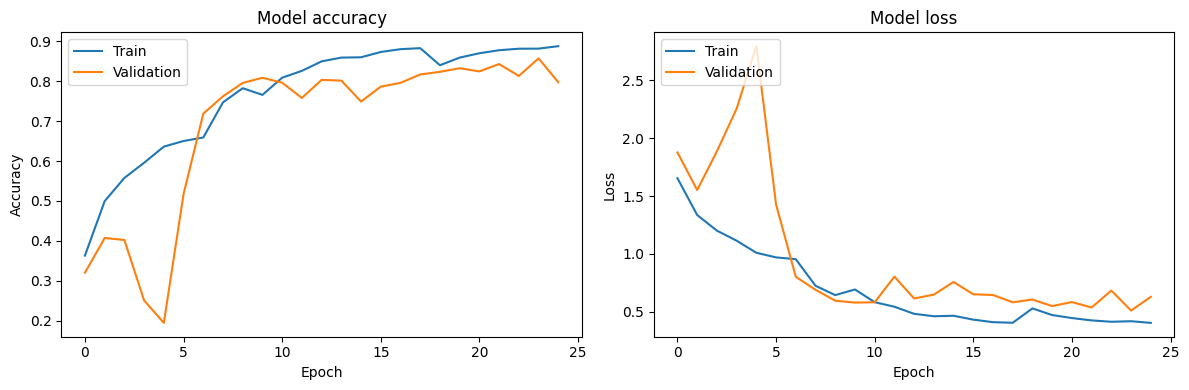

49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8272 - loss: 0.6131
Test accuracy: 81.65%


In [ ]:
# Model components as defined in your updated version
class TubeletEmbedding(layers.Layer):
    def __init__(self, embed_dim, patch_size, strides, weight_decay, **kwargs):
        super().__init__(**kwargs)
        self.projection = layers.Conv3D(
            filters=embed_dim,
            kernel_size=patch_size,
            strides=(1,2,2),
            padding="same",
            kernel_regularizer=l2(weight_decay)
        )
        self.flatten = layers.Reshape(target_shape=(35, -1))

    def call(self, videos):
        projected_patches = self.projection(videos)
        flattened_patches = self.flatten(projected_patches)
        return flattened_patches

class PositionalEncoder(layers.Layer):
    def __init__(self, sequence_length=35, **kwargs):
        super().__init__(**kwargs)
        self.sequence_length = sequence_length

    def build(self, input_shape):
        # input_shape[-1] captures the dynamic dimensionality of the last axis
        self.position_embedding = self.add_weight(
            shape=(self.sequence_length, input_shape[-1]),
            initializer="random_normal",
            trainable=True,
            name="pos_embedding"
        )

    def call(self, encoded_tokens):
        # Expand position embeddings to match the batch size dynamically
        position_embeddings = tf.broadcast_to(self.position_embedding, shape=tf.shape(encoded_tokens))
        return encoded_tokens + position_embeddings

# Preprocessing and data loader functions
def preprocess(frames: tf.Tensor, label: tf.Tensor):
    frames = tf.image.convert_image_dtype(frames, tf.float32)
    label = tf.cast(label, tf.float32)
    return frames, label

def prepare_dataloader(videos: np.ndarray, labels: np.ndarray, loader_type: str = "train", batch_size: int = 35):
    dataset = tf.data.Dataset.from_tensor_slices((videos, labels))
    if loader_type == "train":
        dataset = dataset.shuffle(batch_size * 2)
    dataloader = dataset.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataloader

# Model creation function adjusted for correct dimensions
def create_vivit_classifier(input_shape, num_classes, num_heads=NUM_HEADS, num_layers=NUM_LAYERS, embed_dim=PROJECTION_DIM, weight_decay=WEIGHT_DECAY):
    inputs = layers.Input(shape=input_shape)
    tubelet_embedder = TubeletEmbedding(embed_dim=embed_dim, patch_size=PATCH_SIZE, strides=STRIDES, weight_decay=weight_decay) ##weight
    # Make sure the PositionalEncoder gets the same embed_dim
    positional_encoder = PositionalEncoder(sequence_length=35)
    x = tubelet_embedder(inputs)
    x = positional_encoder(x)

    for _ in range(num_layers):
        x = layers.LayerNormalization()(x)
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, kernel_regularizer=l2(weight_decay))(x, x) ##l2
        x = layers.Dropout(0.3)(x) # avoid overfitting
        x = layers.BatchNormalization()(x)
        x = layers.Dense(embed_dim, activation='relu', kernel_regularizer=l2(weight_decay))(x) ##added l2

    representation = layers.LayerNormalization()(x)
    outputs = layers.Dense(num_classes, activation="softmax", kernel_regularizer=l2(weight_decay))(representation) ##l2
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Experiment execution function with plotting
def run_experiment():

    trainloader = prepare_dataloader(X_train, Y_train, "train", BATCH_SIZE)
    validloader = prepare_dataloader(X_val, Y_val, "valid", BATCH_SIZE)
    testloader = prepare_dataloader(X_test, y_test, "test", BATCH_SIZE)

    model = create_vivit_classifier(INPUT_SHAPE, NUM_CLASSES, weight_decay=WEIGHT_DECAY)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Fit the model and capture the history
    history = model.fit(trainloader, epochs=EPOCHS, validation_data=validloader)#,callbacks=[early_stopping]) ##added callbacks

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    _, accuracy = model.evaluate(testloader)
    print(f"Test accuracy: {accuracy * 100:.2f}%")
    return model

model = run_experiment()

#more training and trials

Epoch 1/500
815/815 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3836 - loss: 1.6592 - val_accuracy: 0.6635 - val_loss: 0.9940
Epoch 2/500
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6909 - loss: 0.8713 - val_accuracy: 0.7361 - val_loss: 0.7357
Epoch 3/500
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6916 - loss: 0.8754 - val_accuracy: 0.4277 - val_loss: 1.4613
Epoch 4/500
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4730 - loss: 1.3934 - val_accuracy: 0.4490 - val_loss: 1.5047
Epoch 5/500
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5629 - loss: 1.1686 - val_accuracy: 0.5652 - val_loss: 1.3532
Epoch 6/500
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6096 - loss: 1.0730 - val_accuracy: 0.5439 - val_loss: 1.2417
Epoch 7/500
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6227 - loss: 1.0474 - val_accuracy: 0.6245 - val_loss: 1.0377
Epoch 8/500
815/815 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6893 - loss: 0.8734 - val_ac

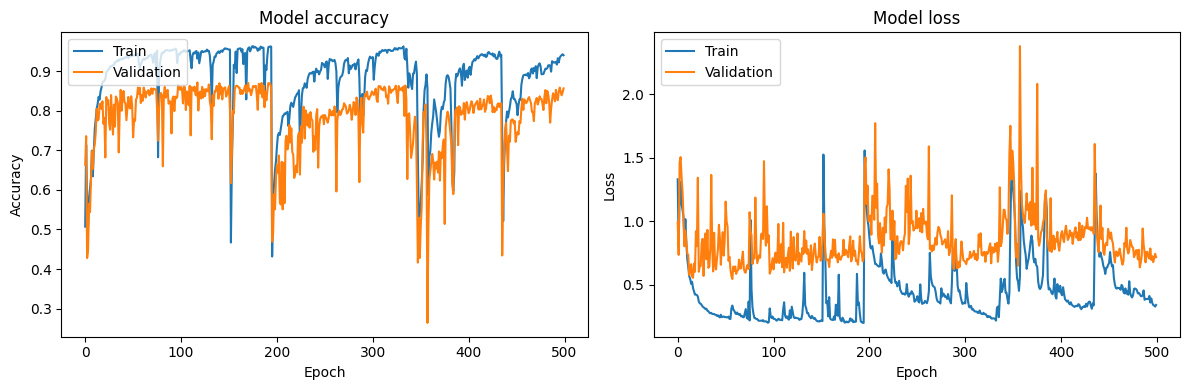

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8703 - loss: 0.7221
Test accuracy: 85.96%


In [ ]:
# Model components as defined in your updated version
class TubeletEmbedding(layers.Layer):
    def __init__(self, embed_dim, patch_size, strides, weight_decay, **kwargs):
        super().__init__(**kwargs)
        self.projection = layers.Conv3D(
            filters=embed_dim,
            kernel_size=patch_size,
            strides=(1,2,2),
            padding="same",
            kernel_regularizer=l2(weight_decay)
        )
        self.flatten = layers.Reshape(target_shape=(35, -1))

    def call(self, videos):
        projected_patches = self.projection(videos)
        flattened_patches = self.flatten(projected_patches)
        return flattened_patches

class PositionalEncoder(layers.Layer):
    def __init__(self, sequence_length=35, **kwargs):
        super().__init__(**kwargs)
        self.sequence_length = sequence_length

    def build(self, input_shape):
        # input_shape[-1] captures the dynamic dimensionality of the last axis
        self.position_embedding = self.add_weight(
            shape=(self.sequence_length, input_shape[-1]),
            initializer="random_normal",
            trainable=True,
            name="pos_embedding"
        )

    def call(self, encoded_tokens):
        # Expand position embeddings to match the batch size dynamically
        position_embeddings = tf.broadcast_to(self.position_embedding, shape=tf.shape(encoded_tokens))
        return encoded_tokens + position_embeddings

# Preprocessing and data loader functions
def preprocess(frames: tf.Tensor, label: tf.Tensor):
    frames = tf.image.convert_image_dtype(frames, tf.float32)
    label = tf.cast(label, tf.float32)
    return frames, label

def prepare_dataloader(videos: np.ndarray, labels: np.ndarray, loader_type: str = "train", batch_size: int = 35):
    dataset = tf.data.Dataset.from_tensor_slices((videos, labels))
    if loader_type == "train":
        dataset = dataset.shuffle(batch_size * 2)
    dataloader = dataset.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataloader

# Model creation function adjusted for correct dimensions
def create_vivit_classifier(input_shape, num_classes, num_heads=NUM_HEADS, num_layers=NUM_LAYERS, embed_dim=PROJECTION_DIM, weight_decay=WEIGHT_DECAY):
    inputs = layers.Input(shape=input_shape)
    tubelet_embedder = TubeletEmbedding(embed_dim=embed_dim, patch_size=PATCH_SIZE, strides=STRIDES, weight_decay=weight_decay) ##weight
    # Make sure the PositionalEncoder gets the same embed_dim
    positional_encoder = PositionalEncoder(sequence_length=35)
    x = tubelet_embedder(inputs)
    x = positional_encoder(x)

    for _ in range(num_layers):
        x = layers.LayerNormalization()(x)
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, kernel_regularizer=l2(weight_decay))(x, x) ##l2
        x = layers.Dropout(0.3)(x) # avoid overfitting
        x = layers.BatchNormalization()(x)
        x = layers.Dense(embed_dim, activation='relu', kernel_regularizer=l2(weight_decay))(x) ##added l2

    representation = layers.LayerNormalization()(x)
    outputs = layers.Dense(num_classes, activation="softmax", kernel_regularizer=l2(weight_decay))(representation) ##l2
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Experiment execution function with plotting
def run_experiment():

    trainloader = prepare_dataloader(X_train, Y_train, "train", BATCH_SIZE)
    validloader = prepare_dataloader(X_val, Y_val, "valid", BATCH_SIZE)
    testloader = prepare_dataloader(X_test, y_test, "test", BATCH_SIZE)

    model = create_vivit_classifier(INPUT_SHAPE, NUM_CLASSES, weight_decay=WEIGHT_DECAY)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Fit the model and capture the history
    history = model.fit(trainloader, epochs=EPOCHS, validation_data=validloader)#,callbacks=[early_stopping]) ##added callbacks

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    _, accuracy = model.evaluate(testloader)
    print(f"Test accuracy: {accuracy * 100:.2f}%")
    return model

model = run_experiment()

Epoch 1/25
403/403 [==============================] - 65s 154ms/step - loss: 1.2332 - accuracy: 0.5529 - val_loss: 0.7877 - val_accuracy: 0.6984
Epoch 2/25
403/403 [==============================] - 52s 128ms/step - loss: 0.7293 - accuracy: 0.7301 - val_loss: 0.5932 - val_accuracy: 0.7722
Epoch 3/25
403/403 [==============================] - 52s 129ms/step - loss: 0.5952 - accuracy: 0.7797 - val_loss: 0.5307 - val_accuracy: 0.8012
Epoch 4/25
403/403 [==============================] - 51s 128ms/step - loss: 0.5154 - accuracy: 0.8108 - val_loss: 0.5184 - val_accuracy: 0.8014
Epoch 5/25
403/403 [==============================] - 51s 127ms/step - loss: 0.4632 - accuracy: 0.8305 - val_loss: 0.5303 - val_accuracy: 0.8025
Epoch 6/25
403/403 [==============================] - 52s 130ms/step - loss: 0.4217 - accuracy: 0.8489 - val_loss: 0.5134 - val_accuracy: 0.8117
Epoch 7/25
403/403 [==============================] - 53s 131ms/step - loss: 0.3920 - accuracy: 0.8593 - val_loss: 0.5575 - val_ac

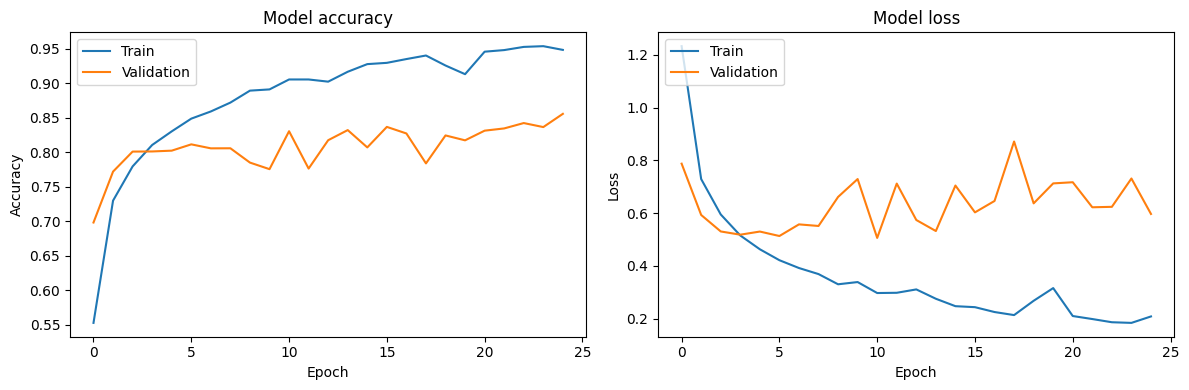

24/24 [==============================] - 1s 42ms/step - loss: 0.5985 - accuracy: 0.8643
Test accuracy: 86.43%


In [ ]:
# Model components as defined in your updated version
class TubeletEmbedding(layers.Layer):
    def __init__(self, embed_dim, patch_size, strides, weight_decay, **kwargs):
        super().__init__(**kwargs)
        self.projection = layers.Conv3D(
            filters=embed_dim,
            kernel_size=patch_size,
            strides=(1,2,2),
            padding="same",
            kernel_regularizer=l2(weight_decay)
        )
        self.flatten = layers.Reshape(target_shape=(35, -1))

    def call(self, videos):
        projected_patches = self.projection(videos)
        flattened_patches = self.flatten(projected_patches)
        return flattened_patches

class PositionalEncoder(layers.Layer):
    def __init__(self, sequence_length=35, **kwargs):
        super().__init__(**kwargs)
        self.sequence_length = sequence_length

    def build(self, input_shape):
        # input_shape[-1] captures the dynamic dimensionality of the last axis
        self.position_embedding = self.add_weight(
            shape=(self.sequence_length, input_shape[-1]),
            initializer="random_normal",
            trainable=True,
            name="pos_embedding"
        )

    def call(self, encoded_tokens):
        # Expand position embeddings to match the batch size dynamically
        position_embeddings = tf.broadcast_to(self.position_embedding, shape=tf.shape(encoded_tokens))
        return encoded_tokens + position_embeddings

# Preprocessing and data loader functions
def preprocess(frames: tf.Tensor, label: tf.Tensor):
    frames = tf.image.convert_image_dtype(frames, tf.float32)
    label = tf.cast(label, tf.float32)
    return frames, label

def prepare_dataloader(videos: np.ndarray, labels: np.ndarray, loader_type: str = "train", batch_size: int = 35):
    dataset = tf.data.Dataset.from_tensor_slices((videos, labels))
    if loader_type == "train":
        dataset = dataset.shuffle(batch_size * 2)
    dataloader = dataset.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataloader

# Model creation function adjusted for correct dimensions
def create_vivit_classifier(input_shape, num_classes, num_heads=NUM_HEADS, num_layers=NUM_LAYERS, embed_dim=PROJECTION_DIM, weight_decay=WEIGHT_DECAY):
    inputs = layers.Input(shape=input_shape)
    tubelet_embedder = TubeletEmbedding(embed_dim=embed_dim, patch_size=PATCH_SIZE, strides=STRIDES, weight_decay=weight_decay) ##weight
    # Make sure the PositionalEncoder gets the same embed_dim
    positional_encoder = PositionalEncoder(sequence_length=35)
    x = tubelet_embedder(inputs)
    x = positional_encoder(x)

    for _ in range(num_layers):
        x = layers.LayerNormalization()(x)
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, kernel_regularizer=l2(weight_decay))(x, x) ##l2
        x = layers.Dropout(0.3)(x) # avoid overfitting
        x = layers.BatchNormalization()(x)
        x = layers.Dense(embed_dim, activation='relu', kernel_regularizer=l2(weight_decay))(x) ##added l2

    representation = layers.LayerNormalization()(x)
    outputs = layers.Dense(num_classes, activation="softmax", kernel_regularizer=l2(weight_decay))(representation) ##l2
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Experiment execution function with plotting
def run_experiment():

    trainloader = prepare_dataloader(X_train, Y_train, "train", BATCH_SIZE)
    validloader = prepare_dataloader(X_val, Y_val, "valid", BATCH_SIZE)
    testloader = prepare_dataloader(X_test, y_test, "test", BATCH_SIZE)

    model = create_vivit_classifier(INPUT_SHAPE, NUM_CLASSES, weight_decay=WEIGHT_DECAY)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Fit the model and capture the history
    history = model.fit(trainloader, epochs=EPOCHS, validation_data=validloader)#,callbacks=[early_stopping]) ##added callbacks

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    _, accuracy = model.evaluate(testloader)
    print(f"Test accuracy: {accuracy * 100:.2f}%")
    return model

model = run_experiment()

In [ ]:
model.save('/content/drive/MyDrive/1PhD/ViViT5.h5')

In [ ]:
from tensorflow.keras.models import load_model

testloader = prepare_dataloader(X_test, y_test, "test", BATCH_SIZE)
loaded_model = load_model('/content/drive/MyDrive/1PhD/ViViT5.h5')

ValueError: Unknown layer: 'TubeletEmbedding'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [ ]:
from tensorflow.keras.models import load_model
#Import the custom layers
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

# Define the custom layers (TubeletEmbedding and PositionalEncoder) here

testloader = prepare_dataloader(X_test, y_test, "test", BATCH_SIZE)

# Load the model using a custom_object_scope
with keras.utils.custom_object_scope({'TubeletEmbedding': TubeletEmbedding, 'PositionalEncoder': PositionalEncoder, 'l2': l2}):
    loaded_model = load_model('/content/drive/MyDrive/1PhD/ViViT5.h5')

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
# Add this function definition before calling it
def plot_model_metrics(f1, accuracy, precision, recall):
    metrics = [f1, accuracy, precision, recall]
    metric_names = ['F1 Score', 'Accuracy', 'Precision', 'Recall']

    plt.bar(metric_names, metrics)
    plt.ylim([0, 1])
    plt.title('Model Performance Metrics')
    plt.ylabel('Score')
    plt.show()

# Evaluate the model on the test set and get predictions (assuming testloader is defined)
test_loss, test_acc = loaded_model.evaluate(testloader)
y_pred_probs = loaded_model.predict(testloader)  # Get predicted probabilities
#y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

# Assuming y_test and y_pred are one-hot encoded
#y_test = np.argmax(y_test, axis=1)  # Convert one-hot to integer labels (ground truth)
y_test = np.argmax(y_test, axis=1)  # Convert one-hot to integer labels (ground truth)
y_pred = np.argmax(y_pred, axis=1)  # Convert one-hot to integer labels (predictions)

# Now you can use f1_score and other metrics
f1 = f1_score(y_test, y_pred, average='weighted')

accuracy = test_acc  # Accuracy already obtained from evaluation
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Visualize the metrics using the now defined plot_model_metrics function
plot_model_metrics(f1, accuracy, precision, recall)

# Print the metrics
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8399 - loss: 0.5737
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
# Add this function definition before calling it
def plot_model_metrics(f1, accuracy, precision, recall):
    metrics = [f1, accuracy, precision, recall]
    metric_names = ['F1 Score', 'Accuracy', 'Precision', 'Recall']

    plt.bar(metric_names, metrics)
    plt.ylim([0, 1])
    plt.title('Model Performance Metrics')
    plt.ylabel('Score')
    plt.show()

# Evaluate the model on the test set and get predictions (assuming testloader is defined)
test_loss, test_acc = loaded_model.evaluate(testloader)
y_pred_probs = loaded_model.predict(testloader)  # Get predicted probabilities

# Convert probabilities to class indices (predictions) - this is where the fix is
y_pred = np.argmax(y_pred_probs, axis=2)
# Reshape y_pred to have the same shape as y_test
y_pred = y_pred.reshape(-1)

# Ensure that y_test is also a 1D array
y_test = y_test.flatten()

# Now you can use f1_score and other metrics
f1 = f1_score(y_test, y_pred, average='weighted')

accuracy = test_acc  # Accuracy already obtained from evaluation
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Visualize the metrics using the now defined plot_model_metrics function
plot_model_metrics(f1, accuracy, precision, recall)

# Print the metrics
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8399 - loss: 0.5737
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


ValueError: Found input variables with inconsistent numbers of samples: [769, 26915]

In [ ]:
y_pred = np.argmax(y_pred, axis=1)  # Select class with highest probability

NameError: name 'y_pred' is not defined

In [ ]:
print("Shape of y_test:", y_test.shape)
print("Sample values of y_test (first 5):", y_test[:5])

print("Shape of y_pred:", y_pred.shape)
print("Sample values of y_pred (first 5):", y_pred[:5])

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred have the same number of samples
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

NameError: name 'y_pred' is not defined

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size as desired

# Create the confusion matrix heatmap
plt.imshow(cm, interpolation='nearest', cmap='Blues')  # Choose other colormaps like 'Greens' or 'YlOrBr'

# Add labels and title
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

# Add tick marks for each class
tick_marks = np.arange(len(np.unique(y_test)))  # Get unique classes from y_test
plt.xticks(tick_marks, np.unique(y_test), rotation=45)  # Rotate class labels for readability
plt.yticks(tick_marks, np.unique(y_test))

# Add text labels for each cell (optional)
for i, row in enumerate(cm):
    for j, value in enumerate(row):
        plt.text(j, i, value, ha='center', va='center', fontsize=8)  # Adjust font size as desired

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

NameError: name 'cm' is not defined

<Figure size 800x600 with 0 Axes>

Epoch 1/100
805/805 [==============================] - 14s 11ms/step - loss: 1.5807 - accuracy: 0.4089 - val_loss: 1.4612 - val_accuracy: 0.4435
Epoch 2/100
805/805 [==============================] - 8s 10ms/step - loss: 1.1486 - accuracy: 0.5545 - val_loss: 1.8073 - val_accuracy: 0.3994
Epoch 3/100
805/805 [==============================] - 8s 10ms/step - loss: 0.9933 - accuracy: 0.6200 - val_loss: 1.9095 - val_accuracy: 0.3980
Epoch 4/100
805/805 [==============================] - 9s 11ms/step - loss: 0.8649 - accuracy: 0.6693 - val_loss: 1.3095 - val_accuracy: 0.5706
Epoch 5/100
805/805 [==============================] - 8s 10ms/step - loss: 0.8042 - accuracy: 0.6923 - val_loss: 1.3540 - val_accuracy: 0.5537
Epoch 6/100
805/805 [==============================] - 8s 10ms/step - loss: 0.8122 - accuracy: 0.6918 - val_loss: 0.9519 - val_accuracy: 0.6189
Epoch 7/100
805/805 [==============================] - 8s 10ms/step - loss: 0.7644 - accuracy: 0.7098 - val_loss: 0.9055 - val_accuracy

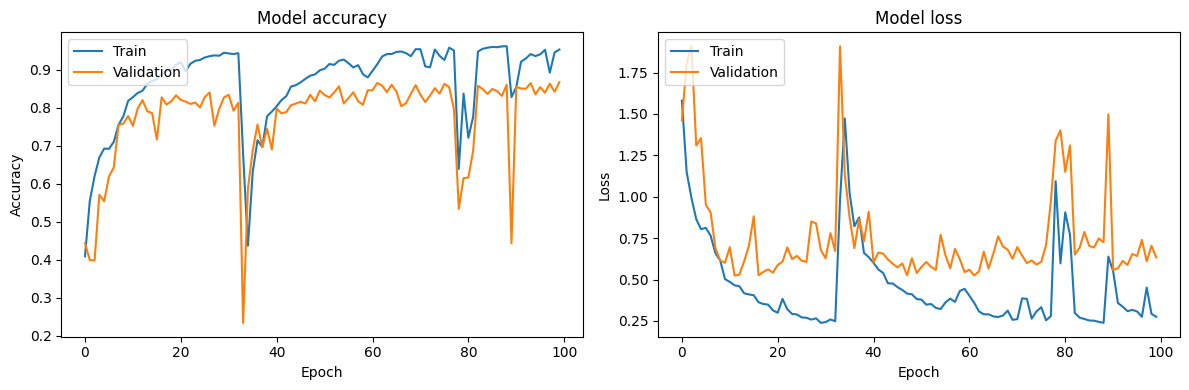

48/48 [==============================] - 0s 5ms/step - loss: 0.6653 - accuracy: 0.8665
Test accuracy: 86.65%


In [ ]:
# Model components as defined in your updated version
class TubeletEmbedding(layers.Layer):
    def __init__(self, embed_dim, patch_size, strides, weight_decay, **kwargs):
        super().__init__(**kwargs)
        self.projection = layers.Conv3D(
            filters=embed_dim,
            kernel_size=patch_size,
            strides=(1,2,2),
            padding="same",
            kernel_regularizer=l2(weight_decay)
        )
        self.flatten = layers.Reshape(target_shape=(35, -1))

    def call(self, videos):
        projected_patches = self.projection(videos)
        flattened_patches = self.flatten(projected_patches)
        return flattened_patches

class PositionalEncoder(layers.Layer):
    def __init__(self, sequence_length=35, **kwargs):
        super().__init__(**kwargs)
        self.sequence_length = sequence_length

    def build(self, input_shape):
        # input_shape[-1] captures the dynamic dimensionality of the last axis
        self.position_embedding = self.add_weight(
            shape=(self.sequence_length, input_shape[-1]),
            initializer="random_normal",
            trainable=True,
            name="pos_embedding"
        )

    def call(self, encoded_tokens):
        # Expand position embeddings to match the batch size dynamically
        position_embeddings = tf.broadcast_to(self.position_embedding, shape=tf.shape(encoded_tokens))
        return encoded_tokens + position_embeddings

# Preprocessing and data loader functions
def preprocess(frames: tf.Tensor, label: tf.Tensor):
    frames = tf.image.convert_image_dtype(frames, tf.float32)
    label = tf.cast(label, tf.float32)
    return frames, label

def prepare_dataloader(videos: np.ndarray, labels: np.ndarray, loader_type: str = "train", batch_size: int = 35):
    dataset = tf.data.Dataset.from_tensor_slices((videos, labels))
    if loader_type == "train":
        dataset = dataset.shuffle(batch_size * 2)
    dataloader = dataset.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataloader

# Model creation function adjusted for correct dimensions
def create_vivit_classifier(input_shape, num_classes, num_heads=NUM_HEADS, num_layers=NUM_LAYERS, embed_dim=PROJECTION_DIM, weight_decay=WEIGHT_DECAY):
    inputs = layers.Input(shape=input_shape)
    tubelet_embedder = TubeletEmbedding(embed_dim=embed_dim, patch_size=PATCH_SIZE, strides=STRIDES, weight_decay=weight_decay) ##weight
    # Make sure the PositionalEncoder gets the same embed_dim
    positional_encoder = PositionalEncoder(sequence_length=35)
    x = tubelet_embedder(inputs)
    x = positional_encoder(x)

    for _ in range(num_layers):
        x = layers.LayerNormalization()(x)
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim, kernel_regularizer=l2(weight_decay))(x, x) ##l2
        x = layers.Dropout(0.3)(x) # avoid overfitting
        x = layers.BatchNormalization()(x)
        x = layers.Dense(embed_dim, activation='relu', kernel_regularizer=l2(weight_decay))(x) ##added l2

    representation = layers.LayerNormalization()(x)
    outputs = layers.Dense(num_classes, activation="softmax", kernel_regularizer=l2(weight_decay))(representation) ##l2
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Experiment execution function with plotting
def run_experiment():

    trainloader = prepare_dataloader(X_train, Y_train, "train", BATCH_SIZE)
    validloader = prepare_dataloader(X_val, Y_val, "valid", BATCH_SIZE)
    testloader = prepare_dataloader(X_test, y_test, "test", BATCH_SIZE)

    model = create_vivit_classifier(INPUT_SHAPE, NUM_CLASSES, weight_decay=WEIGHT_DECAY)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    #early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

    # Fit the model and capture the history
    history = model.fit(trainloader, epochs=EPOCHS, validation_data=validloader)#, callbacks=[early_stopping]) ##added callbacks

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    _, accuracy = model.evaluate(testloader)
    print(f"Test accuracy: {accuracy * 100:.2f}%")
    return model

model = run_experiment()

In [ ]:
def create_vivit_classifier(input_shape, num_classes, num_heads, num_layers, embed_dim,  weight_decay, strides):
    inputs = layers.Input(shape=input_shape)
    tubelet_embedder = TubeletEmbedding(embed_dim=embed_dim, patch_size=(2, 2, 2), weight_decay=weight_decay, strides = strides)
    positional_encoder = PositionalEncoder(sequence_length=35)
    x = tubelet_embedder(inputs)
    x = positional_encoder(x)

    for _ in range(num_layers):
        x = layers.LayerNormalization()(x)
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x, x)
        x = layers.Dense(embed_dim, activation='mish')(x)

    representation = layers.LayerNormalization()(x)
    outputs = layers.Dense(num_classes, activation="softmax")(representation)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Example usage
model = create_vivit_classifier(INPUT_SHAPE, NUM_CLASSES, NUM_HEADS, NUM_LAYERS, PROJECTION_DIM, WEIGHT_DECAY, STRIDES)
model.summary()  # This will print out the number of nodes in each layer

###Architecture using netron

In [ ]:
pip install netron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.1 MB/s eta 0:00:00


In [ ]:
model.save('vivit_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('vivit_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##1000 epochs

Epoch 1/1000
507/507 [==============================] - 35s 63ms/step - loss: 1.9945 - accuracy: 0.1529 - val_loss: 1.9637 - val_accuracy: 0.1826
Epoch 2/1000
507/507 [==============================] - 32s 63ms/step - loss: 1.7981 - accuracy: 0.2361 - val_loss: 1.7141 - val_accuracy: 0.2046
Epoch 3/1000
507/507 [==============================] - 32s 63ms/step - loss: 1.5630 - accuracy: 0.3304 - val_loss: 1.5483 - val_accuracy: 0.3005
Epoch 4/1000
507/507 [==============================] - 31s 62ms/step - loss: 1.4530 - accuracy: 0.3829 - val_loss: 1.4851 - val_accuracy: 0.3502
Epoch 5/1000
507/507 [==============================] - 30s 59ms/step - loss: 1.4030 - accuracy: 0.4204 - val_loss: 1.5854 - val_accuracy: 0.3475
Epoch 6/1000
507/507 [==============================] - 31s 60ms/step - loss: 1.7036 - accuracy: 0.3028 - val_loss: 1.9429 - val_accuracy: 0.1826
Epoch 7/1000
507/507 [==============================] - 30s 59ms/step - loss: 1.6137 - accuracy: 0.3167 - val_loss: 1.6241 -

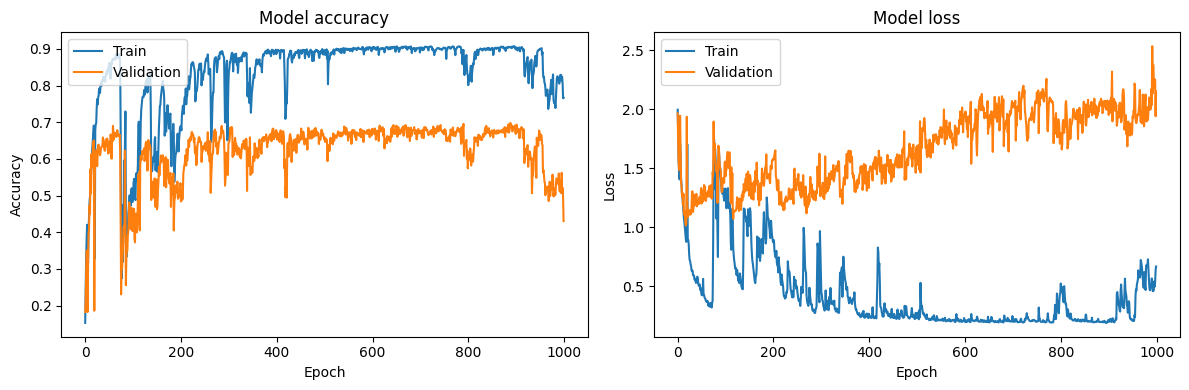

30/30 [==============================] - 1s 18ms/step - loss: 2.4787 - accuracy: 0.3968
Test accuracy: 39.68%


In [ ]:
# Model components as defined in your updated version
class TubeletEmbedding(layers.Layer):
    def __init__(self, embed_dim, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.projection = layers.Conv3D(
            filters=embed_dim,
            kernel_size=patch_size,
            strides=(1, 2, 2),
            padding="same"
        )
        self.flatten = layers.Reshape(target_shape=(35, -1))

    def call(self, videos):
        projected_patches = self.projection(videos)
        flattened_patches = self.flatten(projected_patches)
        return flattened_patches

class PositionalEncoder(layers.Layer):
    def __init__(self, sequence_length=35, **kwargs):
        super().__init__(**kwargs)
        self.sequence_length = sequence_length

    def build(self, input_shape):
        # input_shape[-1] captures the dynamic dimensionality of the last axis
        self.position_embedding = self.add_weight(
            shape=(self.sequence_length, input_shape[-1]),
            initializer="random_normal",
            trainable=True,
            name="pos_embedding"
        )

    def call(self, encoded_tokens):
        # Expand position embeddings to match the batch size dynamically
        position_embeddings = tf.broadcast_to(self.position_embedding, shape=tf.shape(encoded_tokens))
        return encoded_tokens + position_embeddings

# Preprocessing and data loader functions
def preprocess(frames: tf.Tensor, label: tf.Tensor):
    frames = tf.image.convert_image_dtype(frames, tf.float32)
    label = tf.cast(label, tf.float32)
    return frames, label

def prepare_dataloader(videos: np.ndarray, labels: np.ndarray, loader_type: str = "train", batch_size: int = 35):
    dataset = tf.data.Dataset.from_tensor_slices((videos, labels))
    if loader_type == "train":
        dataset = dataset.shuffle(batch_size * 2)
    dataloader = dataset.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataloader

# Model creation function adjusted for correct dimensions
def create_vivit_classifier(input_shape, num_classes, num_heads=NUM_HEADS, num_layers=NUM_LAYERS, embed_dim=64):
    inputs = layers.Input(shape=input_shape)
    tubelet_embedder = TubeletEmbedding(embed_dim=embed_dim, patch_size=(2, 2, 2))
    # Make sure the PositionalEncoder gets the same embed_dim
    positional_encoder = PositionalEncoder(sequence_length=35)
    x = tubelet_embedder(inputs)
    x = positional_encoder(x)
    for _ in range(num_layers):
        x = layers.LayerNormalization()(x)
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x, x)
        x = layers.Dense(embed_dim, activation='relu')(x)
    representation = layers.LayerNormalization()(x)
    outputs = layers.Dense(num_classes, activation="softmax")(representation)
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Experiment execution function with plotting
def run_experiment():
    trainloader = prepare_dataloader(X_train, Y_train, "train", BATCH_SIZE)
    validloader = prepare_dataloader(X_val, Y_val, "valid", BATCH_SIZE)
    testloader = prepare_dataloader(X_test, y_test, "test", BATCH_SIZE)

    model = create_vivit_classifier(INPUT_SHAPE, NUM_CLASSES)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit the model and capture the history
    history = model.fit(trainloader, epochs=EPOCHS, validation_data=validloader)

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    _, accuracy = model.evaluate(testloader)
    print(f"Test accuracy: {accuracy * 100:.2f}%")
    return model

model = run_experiment()

##Playing with parameters

Epoch 1/50
380/380 [==============================] - 22s 43ms/step - loss: 2.0731 - accuracy: 0.1527 - val_loss: 1.9773 - val_accuracy: 0.1334
Epoch 2/50
380/380 [==============================] - 16s 42ms/step - loss: 1.9646 - accuracy: 0.1667 - val_loss: 1.9789 - val_accuracy: 0.1334
Epoch 3/50
380/380 [==============================] - 16s 41ms/step - loss: 1.9598 - accuracy: 0.1710 - val_loss: 1.9771 - val_accuracy: 0.1334
Epoch 4/50
380/380 [==============================] - 16s 41ms/step - loss: 1.9591 - accuracy: 0.1734 - val_loss: 1.9738 - val_accuracy: 0.1334
Epoch 5/50
380/380 [==============================] - 15s 41ms/step - loss: 1.9580 - accuracy: 0.1719 - val_loss: 1.9714 - val_accuracy: 0.1334
Epoch 6/50
380/380 [==============================] - 16s 41ms/step - loss: 1.9580 - accuracy: 0.1708 - val_loss: 1.9700 - val_accuracy: 0.1334
Epoch 7/50
380/380 [==============================] - 16s 41ms/step - loss: 1.9588 - accuracy: 0.1720 - val_loss: 1.9694 - val_accuracy:

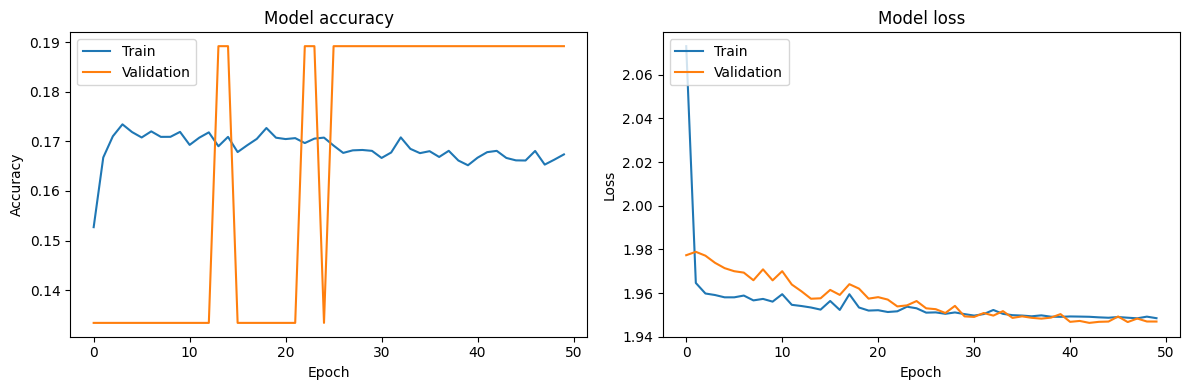

23/23 [==============================] - 0s 13ms/step - loss: 1.9478 - accuracy: 0.1640
Test accuracy: 16.40%


In [ ]:
# Model components as defined in your updated version
class TubeletEmbedding(layers.Layer):
    def __init__(self, embed_dim, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.projection = layers.Conv3D(
            filters=embed_dim,
            kernel_size=patch_size,
            strides=(1, 2, 2),
            padding="same"
        )
        self.flatten = layers.Reshape(target_shape=(35, -1))

    def call(self, videos):
        projected_patches = self.projection(videos)
        flattened_patches = self.flatten(projected_patches)
        return flattened_patches

class PositionalEncoder(layers.Layer):
    def __init__(self, sequence_length=35, **kwargs):
        super().__init__(**kwargs)
        self.sequence_length = sequence_length

    def build(self, input_shape):
        # input_shape[-1] captures the dynamic dimensionality of the last axis
        self.position_embedding = self.add_weight(
            shape=(self.sequence_length, input_shape[-1]),
            initializer="random_normal",
            trainable=True,
            name="pos_embedding"
        )

    def call(self, encoded_tokens):
        # Expand position embeddings to match the batch size dynamically
        position_embeddings = tf.broadcast_to(self.position_embedding, shape=tf.shape(encoded_tokens))
        return encoded_tokens + position_embeddings

# Preprocessing and data loader functions
def preprocess(frames: tf.Tensor, label: tf.Tensor):
    frames = tf.image.convert_image_dtype(frames, tf.float32)
    label = tf.cast(label, tf.float32)
    return frames, label

def prepare_dataloader(videos: np.ndarray, labels: np.ndarray, loader_type: str = "train", batch_size: int = 35):
    dataset = tf.data.Dataset.from_tensor_slices((videos, labels))
    if loader_type == "train":
        dataset = dataset.shuffle(batch_size * 2)
    dataloader = dataset.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataloader

# Model creation function adjusted for correct dimensions
def create_vivit_classifier(input_shape, num_classes, num_heads=NUM_HEADS, num_layers=NUM_LAYERS, embed_dim=128):
    inputs = layers.Input(shape=input_shape)
    tubelet_embedder = TubeletEmbedding(embed_dim=embed_dim, patch_size=(2, 2, 2))
    # Make sure the PositionalEncoder gets the same embed_dim
    positional_encoder = PositionalEncoder(sequence_length=35)
    x = tubelet_embedder(inputs)
    x = positional_encoder(x)
    for _ in range(num_layers):
        x = layers.LayerNormalization()(x)
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x, x)
        x = layers.Dense(embed_dim, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(WEIGHT_DECAY))(x)  # Add L2 regularization
        x = layers.Dropout(0.5)(x)
    representation = layers.LayerNormalization()(x)
    outputs = layers.Dense(num_classes, activation="softmax")(representation)
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Experiment execution function
def run_experiment():

    trainloader = prepare_dataloader(X_train, Y_train, "train", BATCH_SIZE)
    validloader = prepare_dataloader(X_val, Y_val, "valid", BATCH_SIZE)
    testloader = prepare_dataloader(X_test, y_test, "test", BATCH_SIZE)

    model = create_vivit_classifier(INPUT_SHAPE, NUM_CLASSES)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit the model and capture the history
    history = model.fit(trainloader, epochs=EPOCHS, validation_data=validloader)

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    _, accuracy = model.evaluate(testloader)
    print(f"Test accuracy: {accuracy * 100:.2f}%")
    return model

model = run_experiment()

In [ ]:
import matplotlib.pyplot as plt

##AST Pretrained model

In [ ]:
!pip install transformers torch librosa

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
from transformers import ASTModel

ast_model = ASTModel.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

In [ ]:
import numpy as np
import torch
from transformers import ASTModel, Wav2Vec2FeatureExtractor

# Load the pre-trained AST model and processor
ast_model = ASTModel.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")
processor = Wav2Vec2FeatureExtractor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

# Function to extract AST features from spectrogram
def extract_ast_features_from_spectrogram(spectrogram):
    spectrogram = spectrogram.astype(np.float32)  # Ensure float32 type
    spectrogram = np.expand_dims(spectrogram, axis=0)  # Add batch dimension
    spectrogram = np.expand_dims(spectrogram, axis=1)  # Add channel dimension
    input_values = torch.tensor(spectrogram)
    with torch.no_grad():
        outputs = ast_model(input_values)
    return outputs.last_hidden_state.squeeze(0).numpy()

# Load and preprocess spectrograms
spectrogram_folder = '/content/drive/MyDrive/HAR/Spectrogram/'
num_spectrograms = 3556

combined_features = []
for i in range(num_spectrograms):
    spectrogram_path = os.path.join(spectrogram_folder, f'spectrogram_{i}.npy')
    spectrogram = np.load(spectrogram_path)
    features = extract_ast_features_from_spectrogram(spectrogram)
    combined_features.append(features)

combined_features = np.array(combined_features)

# Assuming combined_labels is already defined
Y_data = np.array(combined_labels)

# Train-test split
X_train, X_val, Y_train, Y_val = train_test_split(combined_features, Y_data, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
NUM_CLASSES = 9
Y_train = to_categorical(Y_train, num_classes=NUM_CLASSES)
Y_val = to_categorical(Y_val, num_classes=NUM_CLASSES)

# Define the ViViT model
from tensorflow.keras.layers import Input, LayerNormalization, MultiHeadAttention, Dropout, BatchNormalization, Dense
from tensorflow.keras.models import Model

def create_vivit_with_ast(input_shape, num_classes, num_heads=2, num_layers=2, embed_dim=128):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_layers):
        x = LayerNormalization()(x)
        x = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x, x)
        x = Dropout(0.1)(x)
        x = BatchNormalization()(x)
        x = Dense(embed_dim, activation='mish')(x)
    representation = LayerNormalization()(x)
    outputs = Dense(num_classes, activation="softmax")(representation)
    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = combined_features.shape[1:]
model = create_vivit_with_ast(input_shape, NUM_CLASSES)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val))

# Evaluate
_, accuracy = model.evaluate(X_val, Y_val)
print(f"Validation accuracy: {accuracy * 100:.2f}%")

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 1, 1025, 1, 35]

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming combined_data and combined_labels are already prepared
combined_features = [extract_ast_features(audio, sampling_rate=16000) for audio in combined_data]

# Convert to numpy arrays and reshape if necessary
X_data = np.array(combined_features)
Y_data = np.array(combined_labels)

# Train-test split
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

# Training
history = model.fit(X_train, Y_train, epochs=EPOCHS, validation_data=(X_val, Y_val))

# Evaluate
_, accuracy = model.evaluate(X_val, Y_val)
print(f"Validation accuracy: {accuracy * 100:.2f}%")

NameError: name 'combined_data' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#preprocessing augmented

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming Y_train, Y_val, and Y_test are already loaded and are in one-hot encoded format

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform class labels (assuming the same unique activities are used)
unique_activities_list = [['bad', 'drop spoon', 'feel terrible', 'coughing', 'silence', 'hungry', 'walking', 'pickup/eat food', 'feel bad']]
label_encoder.fit(unique_activities_list)

def one_hot_to_labels(one_hot):
    return np.argmax(one_hot, axis=-1).flatten()

Y_train_labels = one_hot_to_labels(Y_train)
Y_val_labels = one_hot_to_labels(Y_val)
y_test_labels = one_hot_to_labels(y_test)

# Combine all labels for overall activity count visualization
all_labels = np.concatenate([Y_train_labels, Y_val_labels, y_test_labels])

ValueError: y should be a 1d array, got an array of shape (1, 9) instead.

In [ ]:
from collections import Counter

# Count occurrences of each label
label_counts = Counter(all_labels)
print(label_counts)

# Convert counts to a list aligned with unique_activities_list
label_counts_list = [label_counts[i] for i in range(len(unique_activities_list))]
print(label_counts_list)

In [ ]:
# Plot the counts as a bar chart
plt.figure(figsize=(10, 7))
plt.bar(unique_activities_list, label_counts_list)
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Count of Activity Labels')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a square matrix with counts on the diagonal
cm = np.zeros((len(unique_activities_list), len(unique_activities_list)), dtype=int)
np.fill_diagonal(cm, label_counts_list)

# Plot confusion matrix style heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=unique_activities_list, yticklabels=unique_activities_list)
plt.xlabel('Activity')
plt.ylabel('Activity')
plt.title('Count of Activity Labels')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a square matrix with counts on the diagonal
cm = np.zeros((len(unique_activities_list), len(unique_activities_list)), dtype=int)
np.fill_diagonal(cm, label_counts_list)

# Plot confusion matrix style heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='blues', xticklabels=unique_activities_list, yticklabels=unique_activities_list)
plt.xlabel('Activity')
plt.ylabel('Activity')
plt.title('Count of Activity Labels')
plt.show()

In [ ]:
import numpy as np

# Define the indices of the classes to be removed
remove_classes = [0, 4]  # Assuming 'coughing' is class 0 and 'pickup/eat food' is class 4

# Filter the data and labels
filtered_data = []
filtered_labels = []

for data, label_list in zip(normal_data_balanced_loaded, normal_label_balanced_loaded):
    # Assuming label_list is a list of labels, extract the first one
    label = label_list[0] # Extract the first label from the list
    if label not in remove_classes:
        filtered_data.append(data)
        filtered_labels.append(label)

# Convert lists to numpy arrays
filtered_data = np.array(filtered_data)
filtered_labels = np.array(filtered_labels)

print(f"Filtered data shape: {filtered_data.shape}")
print(f"Filtered labels shape: {filtered_labels.shape}")

Filtered data shape: (3556, 17640)
Filtered labels shape: (3556,)


In [ ]:
# Ensure all data points have the same length by padding them
max_length = max(len(x) for x in filtered_data)
padded_data = []

for x in filtered_data:
    if len(x) < max_length:
        x = np.pad(x, (0, max_length - len(x)), mode='constant')
    padded_data.append(x)

filtered_data = np.array(padded_data)
print(f"Padded data shape: {filtered_data.shape}")

Padded data shape: (3556, 17640)


#Integrate CNN features in transformers

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, Flatten, Dense

# Example of manually reconstructing the model without BatchNormalization
input_layer = Input(shape=(35, 41, 25, 1))
x = Conv3D(16, (3, 3, 3), activation='relu')(input_layer)
# Skip or replace the problematic BatchNormalization layer
# x = BatchNormalization()(x)  # If necessary, this line could be commented out or replaced
x = Flatten()(x)
x = Dense(9, activation='softmax')(x)

cnn_model = Model(inputs=input_layer, outputs=x)

# Load weights if they were saved separately
cnn_model.load_weights('/content/drive/MyDrive/1HAR/cnn_model.h5')

ValueError: Layer count mismatch when loading weights from file. Model expected 2 layers, found 7 saved layers.

In [ ]:
from tensorflow.keras.models import load_model

# Load model in the original environment
original_model = load_model('/content/drive/MyDrive/1HAR/cnn_model.h5')

# Resave using the latest format
original_model.save('/content/drive/MyDrive/1HAR/cnn_model.h5', save_format='h5')


TypeError: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None}.

Exception encountered: Error when deserializing class 'BatchNormalization' using config={'name': 'batch_normalization', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}.

Exception encountered: int() argument must be a string, a bytes-like object or a real number, not 'list'

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization

custom_objects = {'BatchNormalization': BatchNormalization}

try:
    cnn_model = load_model(model_path, custom_objects=custom_objects)
    print("Model loaded successfully.")
except TypeError as e:
    print(f"TypeError encountered: {e}")
except OSError as e:
    print(f"OSError encountered: {e}")

TypeError encountered: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config'

In [ ]:
from tensorflow.keras.models import load_model

try:
    cnn_model = load_model('/content/drive/MyDrive/1HAR/cnn_model.h5')
    print("Model loaded successfully.")
except OSError as e:
    print(f"Error loading model: {e}")

TypeError: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None}.

Exception encountered: Error when deserializing class 'BatchNormalization' using config={'name': 'batch_normalization', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}.

Exception encountered: int() argument must be a string, a bytes-like object or a real number, not 'list'

In [ ]:
from tensorflow.keras.models import load_model
cnn_model = load_model('/content/drive/MyDrive/HAR/jeny7_cnn_lstm_model.h5')

In [ ]:
from tensorflow.keras.models import Model
feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.layers[-2].output)

In [ ]:
def extract_features(spectrograms):
    return feature_extractor.predict(spectrograms)

In [ ]:
import torch
from torch import nn

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 512)
        self.transformer = nn.Transformer(d_model=512, nhead=8, num_encoder_layers=6)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = self.fc(x.mean(dim=1))
        return x

model = TransformerModel(input_dim=512, num_classes=9)  # Adjust the input_dim and num_classes as needed

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
from sklearn.preprocessing import LabelEncoder
unique_activities = set()

# Iterate over each dictionary in the list and add the "activity" key to the set
for item in normal_label_balanced_loaded:
# for item in label_test:
    for subitem in item:
       unique_activities.add(subitem['activity'])

# Convert the set to a list
unique_activities_list = list(unique_activities)

print(unique_activities_list)


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform class labels
encoded_labels = label_encoder.fit_transform(unique_activities_list)

print("Original labels:", unique_activities_list)
print("Encoded labels:", encoded_labels)

# # Inverse transform to get back original labels from encoded labels
# decoded_labels = label_encoder.inverse_transform(encoded_labels)
# print("Decoded labels:", decoded_labels)

['silence', 'walking', 'drop spoon', 'feel bad', 'pickup/eat food', 'coughing', 'hungry']
Original labels: ['silence', 'walking', 'drop spoon', 'feel bad', 'pickup/eat food', 'coughing', 'hungry']
Encoded labels: [5 6 1 2 4 0 3]


In [ ]:
def create_label_vector(labels, num_time_bins, audio_file_start_time, bin_duration,encoded_labels):
    label_vector = []

    # Iterate over each time bin
    for i in range(num_time_bins):
        bin_start_time = audio_file_start_time + i * bin_duration
        bin_end_time = bin_start_time + bin_duration

        # Find labels that overlap with the current time bin
        overlapping_labels = [label['activity'] for label in labels if label['time_range'][0] <= bin_end_time and label['time_range'][1] >= bin_start_time]

        # Assign a label to the time bin based on certain criteria
        if overlapping_labels:
            label = overlapping_labels[0]
            encoded_label = label_encoder.transform([label])[0]
            # For simplicity, let's just take the first overlapping label
            label_vector.append(encoded_label)
        else:
            # If no label overlaps with the time bin, assign a default label (e.g., "silence")
            label_vector.append(-1)  # You can adjust this as needed

    return label_vector

# Example usage:
num_time_bins = 35  # Number of time bins in the spectrogram
bin_duration = 0.4 / num_time_bins  # Duration of each time bin (400 ms divided by the number of time bins)
encoded_labels=encoded_labels
y_all=[]
for y in normal_label_balanced_loaded:
# labels = [{'activity': 'pickup/eat food', 'weight': 0.548469387755102, 'time_range': (2.4, 2.619387755102041), 'windowpath': 'Series2_SM23'}, {'activity': 'silence', 'weight': 0.45153061224489793, 'time_range': (2.619387755102041, 2.8), 'windowpath': 'Series2_SM23'}]
    # print(y)
    audio_file_start_time = y[0]['time_range'][0]
    label_vector = create_label_vector(y, num_time_bins, audio_file_start_time, bin_duration,encoded_labels)
    y_all.append(label_vector)

In [ ]:
def process_spectrograms(spectrograms, labels, label_to_check1, label_to_check2):
    processed_spectrograms = []
    all_frames = np.concatenate(spectrograms)
    # dataset_mean_amplitude = np.mean(all_frames)
    median_amplitude = np.median(np.concatenate(spectrograms))
    percentile_95 = np.percentile(np.concatenate(spectrograms), 95)



    for idx in range(len(spectrograms)):

        spectrogram = spectrograms[idx]
        dataset_mean_amplitude = np.mean(spectrogram)
        label_sequence = labels[idx]
        new_spectrogram = np.copy(spectrogram)

        if label_to_check1 in label_sequence or label_to_check2 in label_sequence:
            activity_indices = [i for i, label in enumerate(label_sequence) if label == label_to_check1 or label == label_to_check2]
            for i in activity_indices:
                        current_amplitude = np.mean(spectrogram[i])
                        # print(dataset_mean_amplitude)
                        # print(current_amplitude)
                        if current_amplitude < dataset_mean_amplitude:
                          if i>0:
                            print("hi")
                            new_spectrogram[i] = new_spectrogram[i - 1]


        processed_spectrograms.append(new_spectrogram)

    return processed_spectrograms
# Set parameters:
label_to_check1 = 6
label_to_check2 = 8
# Process the spectrograms based on the defined criteria:
processed_spectrograms = process_spectrograms(spectrograms_all, y_all, label_to_check1,label_to_check2)

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


In [ ]:
import numpy as np

def process_spectrograms(spectrograms, labels, label_to_check1, label_to_check2, threshold_factor=1):
    processed_spectrograms = []

    for spectrogram, label_sequence in zip(spectrograms, labels):
        # Calculate RMS energy for the current spectrogram
        rms_energy = np.sqrt(np.mean(np.square(spectrogram), axis=0))

        # Compute threshold for classifying frames as silent or low amplitude
        threshold = np.mean(rms_energy) * threshold_factor

        new_spectrogram = np.copy(spectrogram)

        if label_to_check1 in label_sequence or label_to_check2 in label_sequence:
            activity_indices = [i for i, label in enumerate(label_sequence) if label == label_to_check1 or label == label_to_check2]
            for i in activity_indices:
                if rms_energy[i] < threshold:
                    if i > 0:
                        new_spectrogram[i] = new_spectrogram[i - 1]
                        # print("hi")

        processed_spectrograms.append(new_spectrogram)

    return processed_spectrograms

# Set parameters:
label_to_check1 = 6
label_to_check2 = 8

# Process the spectrograms based on the defined criteria:
processed_spectrograms = process_spectrograms(spectrograms_all, y_all, label_to_check1, label_to_check2)

In [ ]:
X_data = np.array(spectrograms_all)
# print(len(X_data))
Y_data=np.array(y_all)
# Split data into training, validation, and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X_data, Y_data, test_size=0.05, shuffle= True, random_state=42)
X_train, X_val, Y_train, Y_val =train_test_split(X_tr,y_tr,  test_size=0.10, shuffle=True)
# Assuming X_spectrograms shape is (num_audio_files, 35, 1025)
X_train = X_train.reshape(-1, 35, 41, 25,1)
X_val = X_val.reshape(-1, 35, 41, 25,1)
X_test = X_test.reshape(-1, 35, 41,25,1)
Y_train=Y_train.reshape(-1, 35, 1)
Y_val=Y_val.reshape(-1, 35, 1)
y_test=y_test.reshape(-1, 35, 1)
# print(Y_train[0])
# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train, num_classes=9)
# Convert labels to one-hot encoding
Y_val = to_categorical(Y_val, num_classes=9)
# Convert labels to one-hot encoding
y_test = to_categorical(y_test, num_classes=9)

In [ ]:
print((X_train.shape))
print((X_val.shape))
print((Y_train.shape))
print((Y_val.shape))
print((X_test.shape))
print((y_test.shape))

(12896, 35, 41, 25, 1)
(1433, 35, 41, 25, 1)
(12896, 35, 9)
(1433, 35, 9)
(755, 35, 41, 25, 1)
(755, 35, 9)


In [ ]:
features = extract_features(spectrograms_all)
features_tensor = torch.tensor(features, dtype=torch.float32)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model" expects 1 input(s), but it received 15084 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:16' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:17' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:18' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:19' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:20' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:21' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:22' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:23' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:24' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:25' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:26' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:27' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:28' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:29' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:30' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:31' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:32' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:33' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:34' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:35' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:36' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:37' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:38' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:39' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:40' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:41' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:42' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:43' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:44' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:45' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:46' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:47' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:48' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:49' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:50' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:51' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:52' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:53' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:54' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:55' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:56' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:57' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:58' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:59' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:60' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:61' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:62' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:63' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:64' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:65' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:66' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:67' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:68' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:69' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:70' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:71' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:72' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:73' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:74' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:75' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:76' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:77' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:78' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:79' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:80' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:81' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:82' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:83' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:84' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:85' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:86' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:87' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:88' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:89' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:90' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:91' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:92' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:93' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:94' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:95' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:96' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:97' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:98' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:99' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1083' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1084' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1085' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1086' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1087' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1088' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1089' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1090' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1091' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1092' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1093' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1094' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1095' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1096' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1097' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1098' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1099' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:1999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2083' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2084' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2085' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2086' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2087' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2088' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2089' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2090' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2091' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2092' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2093' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2094' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2095' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2096' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2097' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2098' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2099' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:2999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3083' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3084' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3085' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3086' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3087' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3088' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3089' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3090' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3091' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3092' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3093' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3094' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3095' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3096' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3097' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3098' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3099' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:3999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4083' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4084' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4085' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4086' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4087' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4088' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4089' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4090' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4091' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4092' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4093' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4094' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4095' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4096' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4097' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4098' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4099' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:4999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5083' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5084' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5085' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5086' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5087' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5088' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5089' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5090' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5091' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5092' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5093' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5094' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5095' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5096' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5097' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5098' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5099' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:5999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6083' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6084' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6085' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6086' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6087' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6088' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6089' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6090' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6091' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6092' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6093' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6094' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6095' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6096' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6097' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6098' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6099' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:6999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7083' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7084' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7085' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7086' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7087' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7088' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7089' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7090' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7091' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7092' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7093' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7094' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7095' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7096' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7097' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7098' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7099' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:7999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8083' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8084' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8085' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8086' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8087' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8088' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8089' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8090' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8091' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8092' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8093' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8094' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8095' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8096' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8097' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8098' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8099' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:8999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9083' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9084' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9085' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9086' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9087' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9088' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9089' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9090' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9091' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9092' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9093' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9094' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9095' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9096' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9097' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9098' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9099' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:9999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10083' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10084' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10085' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10086' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10087' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10088' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10089' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10090' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10091' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10092' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10093' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10094' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10095' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10096' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10097' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10098' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10099' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:10999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11083' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11084' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11085' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11086' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11087' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11088' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11089' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11090' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11091' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11092' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11093' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11094' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11095' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11096' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11097' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11098' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11099' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:11999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12083' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12084' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12085' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12086' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12087' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12088' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12089' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12090' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12091' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12092' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12093' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12094' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12095' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12096' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12097' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12098' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12099' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:12999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13083' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13084' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13085' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13086' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13087' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13088' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13089' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13090' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13091' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13092' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13093' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13094' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13095' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13096' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13097' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13098' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13099' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:13999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14083' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14084' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14085' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14086' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14087' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14088' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14089' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14090' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14091' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14092' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14093' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14094' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14095' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14096' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14097' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14098' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14099' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14100' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14101' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14102' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14103' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14104' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14105' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14106' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14107' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14108' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14109' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14110' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14111' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14112' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14113' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14114' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14115' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14116' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14117' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14118' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14119' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14120' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14121' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14122' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14123' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14124' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14125' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14126' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14127' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14128' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14129' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14130' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14131' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14132' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14133' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14134' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14135' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14136' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14137' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14138' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14139' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14140' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14141' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14142' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14143' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14144' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14145' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14146' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14147' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14148' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14149' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14150' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14151' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14152' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14153' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14154' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14155' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14156' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14157' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14158' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14159' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14160' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14161' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14162' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14163' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14164' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14165' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14166' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14167' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14168' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14169' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14170' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14171' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14172' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14173' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14174' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14175' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14176' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14177' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14178' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14179' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14180' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14181' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14182' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14183' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14184' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14185' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14186' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14187' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14188' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14189' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14190' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14191' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14192' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14193' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14194' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14195' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14196' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14197' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14198' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14199' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14200' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14201' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14202' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14203' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14204' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14205' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14206' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14207' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14208' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14209' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14210' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14211' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14212' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14213' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14214' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14215' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14216' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14217' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14218' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14219' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14220' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14221' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14222' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14223' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14224' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14225' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14226' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14227' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14228' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14229' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14230' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14231' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14232' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14233' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14234' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14235' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14236' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14237' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14238' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14239' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14240' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14241' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14242' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14243' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14244' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14245' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14246' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14247' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14248' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14249' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14250' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14251' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14252' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14253' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14254' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14255' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14256' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14257' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14258' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14259' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14260' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14261' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14262' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14263' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14264' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14265' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14266' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14267' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14268' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14269' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14270' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14271' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14272' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14273' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14274' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14275' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14276' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14277' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14278' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14279' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14280' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14281' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14282' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14283' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14284' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14285' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14286' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14287' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14288' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14289' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14290' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14291' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14292' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14293' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14294' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14295' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14296' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14297' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14298' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14299' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14300' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14301' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14302' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14303' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14304' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14305' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14306' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14307' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14308' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14309' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14310' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14311' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14312' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14313' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14314' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14315' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14316' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14317' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14318' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14319' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14320' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14321' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14322' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14323' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14324' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14325' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14326' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14327' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14328' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14329' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14330' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14331' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14332' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14333' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14334' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14335' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14336' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14337' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14338' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14339' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14340' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14341' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14342' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14343' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14344' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14345' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14346' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14347' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14348' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14349' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14350' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14351' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14352' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14353' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14354' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14355' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14356' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14357' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14358' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14359' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14360' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14361' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14362' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14363' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14364' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14365' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14366' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14367' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14368' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14369' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14370' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14371' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14372' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14373' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14374' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14375' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14376' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14377' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14378' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14379' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14380' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14381' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14382' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14383' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14384' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14385' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14386' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14387' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14388' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14389' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14390' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14391' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14392' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14393' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14394' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14395' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14396' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14397' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14398' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14399' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14400' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14401' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14402' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14403' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14404' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14405' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14406' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14407' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14408' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14409' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14410' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14411' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14412' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14413' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14414' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14415' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14416' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14417' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14418' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14419' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14420' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14421' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14422' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14423' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14424' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14425' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14426' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14427' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14428' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14429' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14430' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14431' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14432' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14433' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14434' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14435' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14436' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14437' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14438' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14439' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14440' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14441' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14442' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14443' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14444' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14445' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14446' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14447' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14448' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14449' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14450' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14451' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14452' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14453' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14454' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14455' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14456' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14457' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14458' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14459' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14460' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14461' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14462' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14463' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14464' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14465' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14466' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14467' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14468' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14469' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14470' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14471' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14472' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14473' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14474' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14475' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14476' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14477' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14478' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14479' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14480' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14481' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14482' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14483' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14484' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14485' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14486' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14487' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14488' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14489' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14490' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14491' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14492' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14493' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14494' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14495' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14496' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14497' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14498' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14499' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14500' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14501' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14502' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14503' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14504' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14505' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14506' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14507' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14508' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14509' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14510' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14511' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14512' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14513' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14514' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14515' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14516' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14517' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14518' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14519' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14520' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14521' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14522' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14523' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14524' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14525' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14526' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14527' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14528' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14529' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14530' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14531' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14532' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14533' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14534' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14535' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14536' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14537' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14538' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14539' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14540' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14541' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14542' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14543' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14544' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14545' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14546' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14547' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14548' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14549' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14550' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14551' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14552' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14553' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14554' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14555' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14556' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14557' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14558' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14559' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14560' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14561' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14562' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14563' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14564' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14565' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14566' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14567' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14568' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14569' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14570' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14571' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14572' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14573' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14574' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14575' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14576' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14577' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14578' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14579' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14580' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14581' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14582' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14583' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14584' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14585' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14586' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14587' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14588' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14589' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14590' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14591' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14592' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14593' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14594' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14595' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14596' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14597' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14598' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14599' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14600' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14601' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14602' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14603' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14604' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14605' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14606' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14607' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14608' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14609' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14610' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14611' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14612' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14613' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14614' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14615' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14616' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14617' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14618' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14619' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14620' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14621' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14622' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14623' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14624' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14625' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14626' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14627' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14628' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14629' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14630' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14631' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14632' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14633' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14634' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14635' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14636' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14637' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14638' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14639' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14640' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14641' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14642' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14643' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14644' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14645' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14646' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14647' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14648' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14649' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14650' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14651' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14652' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14653' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14654' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14655' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14656' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14657' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14658' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14659' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14660' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14661' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14662' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14663' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14664' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14665' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14666' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14667' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14668' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14669' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14670' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14671' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14672' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14673' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14674' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14675' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14676' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14677' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14678' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14679' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14680' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14681' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14682' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14683' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14684' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14685' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14686' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14687' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14688' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14689' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14690' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14691' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14692' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14693' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14694' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14695' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14696' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14697' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14698' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14699' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14700' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14701' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14702' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14703' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14704' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14705' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14706' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14707' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14708' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14709' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14710' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14711' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14712' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14713' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14714' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14715' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14716' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14717' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14718' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14719' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14720' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14721' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14722' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14723' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14724' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14725' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14726' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14727' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14728' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14729' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14730' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14731' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14732' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14733' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14734' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14735' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14736' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14737' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14738' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14739' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14740' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14741' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14742' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14743' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14744' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14745' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14746' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14747' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14748' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14749' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14750' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14751' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14752' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14753' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14754' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14755' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14756' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14757' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14758' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14759' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14760' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14761' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14762' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14763' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14764' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14765' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14766' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14767' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14768' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14769' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14770' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14771' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14772' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14773' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14774' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14775' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14776' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14777' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14778' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14779' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14780' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14781' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14782' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14783' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14784' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14785' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14786' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14787' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14788' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14789' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14790' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14791' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14792' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14793' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14794' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14795' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14796' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14797' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14798' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14799' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14800' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14801' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14802' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14803' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14804' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14805' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14806' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14807' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14808' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14809' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14810' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14811' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14812' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14813' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14814' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14815' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14816' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14817' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14818' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14819' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14820' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14821' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14822' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14823' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14824' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14825' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14826' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14827' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14828' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14829' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14830' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14831' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14832' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14833' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14834' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14835' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14836' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14837' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14838' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14839' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14840' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14841' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14842' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14843' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14844' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14845' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14846' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14847' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14848' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14849' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14850' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14851' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14852' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14853' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14854' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14855' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14856' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14857' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14858' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14859' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14860' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14861' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14862' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14863' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14864' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14865' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14866' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14867' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14868' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14869' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14870' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14871' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14872' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14873' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14874' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14875' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14876' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14877' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14878' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14879' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14880' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14881' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14882' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14883' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14884' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14885' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14886' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14887' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14888' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14889' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14890' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14891' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14892' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14893' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14894' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14895' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14896' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14897' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14898' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14899' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14900' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14901' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14902' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14903' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14904' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14905' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14906' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14907' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14908' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14909' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14910' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14911' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14912' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14913' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14914' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14915' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14916' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14917' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14918' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14919' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14920' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14921' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14922' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14923' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14924' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14925' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14926' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14927' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14928' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14929' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14930' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14931' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14932' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14933' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14934' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14935' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14936' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14937' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14938' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14939' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14940' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14941' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14942' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14943' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14944' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14945' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14946' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14947' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14948' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14949' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14950' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14951' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14952' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14953' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14954' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14955' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14956' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14957' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14958' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14959' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14960' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14961' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14962' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14963' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14964' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14965' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14966' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14967' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14968' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14969' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14970' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14971' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14972' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14973' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14974' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14975' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14976' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14977' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14978' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14979' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14980' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14981' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14982' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14983' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14984' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14985' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14986' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14987' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14988' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14989' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14990' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14991' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14992' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14993' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14994' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14995' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14996' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14997' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14998' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:14999' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15000' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15001' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15002' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15003' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15004' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15005' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15006' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15007' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15008' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15009' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15010' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15011' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15012' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15013' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15014' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15015' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15016' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15017' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15018' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15019' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15020' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15021' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15022' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15023' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15024' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15025' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15026' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15027' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15028' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15029' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15030' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15031' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15032' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15033' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15034' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15035' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15036' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15037' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15038' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15039' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15040' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15041' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15042' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15043' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15044' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15045' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15046' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15047' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15048' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15049' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15050' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15051' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15052' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15053' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15054' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15055' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15056' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15057' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15058' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15059' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15060' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15061' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15062' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15063' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15064' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15065' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15066' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15067' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15068' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15069' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15070' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15071' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15072' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15073' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15074' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15075' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15076' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15077' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15078' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15079' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15080' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15081' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15082' shape=(None, 35) dtype=float32>, <tf.Tensor 'IteratorGetNext:15083' shape=(None, 35) dtype=float32>]


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_transformer(model, train_loader):
    model.train()
    for batch in train_loader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_transformer(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test_loader:
            inputs, labels = batch
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

In [ ]:
# Load the trained CNN model
cnn_model = load_model('/content/drive/MyDrive/1HAR/cnn_model.h5')

# Assuming spectrograms_all is your dataset
X_data = np.array(spectrograms_all)
Y_data = np.array(y_all)

# Split data into training, validation, and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X_data, Y_data, test_size=0.05, shuffle=True, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_tr, y_tr, test_size=0.10, shuffle=True)

# Reshape data to match CNN input shape
X_train = X_train.reshape(-1, 35, 41, 25, 1)
X_val = X_val.reshape(-1, 35, 41, 25, 1)
X_test = X_test.reshape(-1, 35, 41, 25, 1)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes=9)
Y_val = to_categorical(Y_val, num_classes=9)
y_test = to_categorical(y_test, num_classes=9)

# Feature extraction function
def extract_features(model, data):
    # Assuming the second to last layer is used for feature extraction
    feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
    features = feature_extractor.predict(data)
    return features

# Extract features
train_features = extract_features(cnn_model, X_train)
val_features = extract_features(cnn_model, X_val)
test_features = extract_features(cnn_model, X_test)

# Flatten features to be compatible with the Transformer model
train_features = train_features.reshape(train_features.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

# Convert features to PyTorch tensors
train_features_tensor = torch.tensor(train_features, dtype=torch.float32)
val_features_tensor = torch.tensor(val_features, dtype=torch.float32)
test_features_tensor = torch.tensor(test_features, dtype=torch.float32)

# Convert labels to PyTorch tensors
train_labels_tensor = torch.tensor(np.argmax(Y_train, axis=-1), dtype=torch.long)
val_labels_tensor = torch.tensor(np.argmax(Y_val, axis=-1), dtype=torch.long)
test_labels_tensor = torch.tensor(np.argmax(y_test, axis=-1), dtype=torch.long)

# Verify shapes
print(train_features_tensor.shape)
print(val_features_tensor.shape)
print(test_features_tensor.shape)
print(train_labels_tensor.shape)
print(val_labels_tensor.shape)
print(test_labels_tensor.shape)

24/24 [==============================] - 1s 50ms/step
torch.Size([12896, 33600])
torch.Size([1433, 33600])
torch.Size([755, 33600])
torch.Size([12896, 35])
torch.Size([1433, 35])
torch.Size([755, 35])


In [ ]:
import torch
from torch import nn

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 512)
        self.transformer = nn.Transformer(d_model=512, nhead=8, num_encoder_layers=6)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer(x)
        x = self.fc(x.mean(dim=1))
        return x

# Initialize the Transformer model
model = TransformerModel(input_dim=train_features_tensor.shape[1], num_classes=9)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_transformer(model, train_loader):
    model.train()
    for batch in train_loader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

def evaluate_transformer(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test_loader:
            inputs, labels = batch
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the trained CNN model
cnn_model = load_model('/content/drive/MyDrive/1HAR/cnn_model.h5')

# Assuming spectrograms_all is your dataset
X_data = np.array(spectrograms_all)
Y_data = np.array(y_all)

# Split data into training, validation, and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X_data, Y_data, test_size=0.05, shuffle=True, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_tr, y_tr, test_size=0.10, shuffle=True)

# Reshape data to match CNN input shape
X_train = X_train.reshape(-1, 35, 41, 25, 1)
X_val = X_val.reshape(-1, 35, 41, 25, 1)
X_test = X_test.reshape(-1, 35, 41, 25, 1)

# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train, num_classes=9)
Y_val = to_categorical(Y_val, num_classes=9)
y_test = to_categorical(y_test, num_classes=9)

# Feature extraction function
def extract_features(model, data):
    feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
    features = feature_extractor.predict(data)
    return features

# Extract features
train_features = extract_features(cnn_model, X_train)
val_features = extract_features(cnn_model, X_val)
test_features = extract_features(cnn_model, X_test)

# Reshape the features to match (batch_size, seq_len, d_model)
train_features = train_features.reshape(train_features.shape[0], -1, 512)
val_features = val_features.reshape(val_features.shape[0], -1, 512)
test_features = test_features.reshape(test_features.shape[0], -1, 512)

# Convert features to PyTorch tensors
train_features_tensor = torch.tensor(train_features, dtype=torch.float32)
val_features_tensor = torch.tensor(val_features, dtype=torch.float32)
test_features_tensor = torch.tensor(test_features, dtype=torch.float32)

# Ensure dimensions are correct
print(train_features_tensor.shape)  # Expected: (batch_size, seq_len, d_model)

# Convert features and labels to PyTorch tensors
train_features_tensor = torch.tensor(train_features, dtype=torch.float32)
val_features_tensor = torch.tensor(val_features, dtype=torch.float32)
test_features_tensor = torch.tensor(test_features, dtype=torch.float32)
train_labels_tensor = torch.tensor(np.argmax(Y_train, axis=-1), dtype=torch.long)
val_labels_tensor = torch.tensor(np.argmax(Y_val, axis=-1), dtype=torch.long)
test_labels_tensor = torch.tensor(np.argmax(y_test, axis=-1), dtype=torch.long)

# Create TensorDatasets and DataLoaders with adjusted shapes
train_dataset = TensorDataset(train_features_tensor, train_labels_tensor)
val_dataset = TensorDataset(val_features_tensor, val_labels_tensor)
test_dataset = TensorDataset(test_features_tensor, test_labels_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class TransformerEncoderModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TransformerEncoderModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 512)
        encoder_layers = nn.TransformerEncoderLayer(d_model=512, nhead=8)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=6)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        print(f'After embedding: {x.shape}')  # Debugging print
        x = self.transformer_encoder(x)
        print(f'After transformer encoder: {x.shape}')  # Debugging print
        x = self.fc(x.mean(dim=1))
        print(f'After fully connected: {x.shape}')  # Debugging print
        return x

# Initialize model, criterion, and optimizer
model = TransformerEncoderModel(input_dim=train_features_tensor.shape[1], num_classes=9)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_transformer(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs = inputs.permute(1, 0, 2)  # Adjust shape to (seq_len, batch_size, d_model)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.permute(1, 0, 2)  # Adjust shape to (seq_len, batch_size, d_model)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}, Val Accuracy: {100 * correct / total}%")

# Train the model
train_transformer(model, train_loader, val_loader, criterion, optimizer, epochs=10)

# Evaluate the model
def evaluate_transformer(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.permute(1, 0, 2)  # Adjust shape to (seq_len, batch_size, d_model)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

evaluate_transformer(model, test_loader)


24/24 [==============================] - 1s 51ms/step


ValueError: cannot reshape array of size 433305600 into shape (12896,newaxis,512)

In [ ]:
from tensorflow.keras.models import load_model, Model
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import torch

# Load the trained CNN model
cnn_model = load_model('/content/drive/MyDrive/1HAR/cnn_model.h5')

# Assuming spectrograms_all is your dataset
X_data = np.array(spectrograms_all)
Y_data = np.array(y_all)

# Split data into training, validation, and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X_data, Y_data, test_size=0.05, shuffle=True, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_tr, y_tr, test_size=0.10, shuffle=True)

# Reshape data to match CNN input shape
X_train = X_train.reshape(-1, 35, 41, 25, 1)
X_val = X_val.reshape(-1, 35, 41, 25, 1)
X_test = X_test.reshape(-1, 35, 41, 25, 1)

# Convert labels to numpy arrays and one-hot encoding
Y_train = to_categorical(np.array(Y_train), num_classes=9)
Y_val = to_categorical(np.array(Y_val), num_classes=9)
y_test = to_categorical(np.array(y_test), num_classes=9)

# Extract features from the CNN model
def extract_features(model, data, layer_name='time_distributed_15'):
    feature_extractor = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    features = feature_extractor.predict(data)
    return features

train_features = extract_features(cnn_model, X_train)
val_features = extract_features(cnn_model, X_val)
test_features = extract_features(cnn_model, X_test)

# Print shapes of extracted features
print("Train features shape:", train_features.shape)
print("Val features shape:", val_features.shape)
print("Test features shape:", test_features.shape)

# Convert features to PyTorch tensors
train_features_tensor = torch.tensor(train_features, dtype=torch.float32)
val_features_tensor = torch.tensor(val_features, dtype=torch.float32)
test_features_tensor = torch.tensor(test_features, dtype=torch.float32)

# Correctly reshape labels for PyTorch
train_labels_tensor = torch.tensor(np.argmax(Y_train, axis=-1).flatten(), dtype=torch.long)
val_labels_tensor = torch.tensor(np.argmax(Y_val, axis=-1).flatten(), dtype=torch.long)
test_labels_tensor = torch.tensor(np.argmax(y_test, axis=-1).flatten(), dtype=torch.long)

# Check the new labels tensor shapes
print("Converted Train labels tensor shape:", train_labels_tensor.shape)
print("Converted Val labels tensor shape:", val_labels_tensor.shape)
print("Converted Test labels tensor shape:", test_labels_tensor.shape)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(train_features_tensor, train_labels_tensor)
val_dataset = TensorDataset(val_features_tensor, val_labels_tensor)
test_dataset = TensorDataset(test_features_tensor, test_labels_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

TypeError: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None}.

Exception encountered: Error when deserializing class 'BatchNormalization' using config={'name': 'batch_normalization', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}.

Exception encountered: int() argument must be a string, a bytes-like object or a real number, not 'list'

In [ ]:
# Load the trained CNN model
cnn_model = load_model('/content/drive/MyDrive/1HAR/cnn_model.h5')

# Assuming spectrograms_all is your dataset
X_data = np.array(spectrograms_all)
Y_data = np.array(y_all)

# Split data into training, validation, and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X_data, Y_data, test_size=0.05, shuffle=True, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_tr, y_tr, test_size=0.10, shuffle=True)

# Reshape data to match CNN input shape
X_train = X_train.reshape(-1, 35, 41, 25, 1)
X_val = X_val.reshape(-1, 35, 41, 25, 1)
X_test = X_test.reshape(-1, 35, 41, 25, 1)

# Convert labels to numpy arrays and one-hot encoding
Y_train = np.array(Y_train)
Y_val = np.array(Y_val)
y_test = np.array(y_test)

Y_train = to_categorical(Y_train, num_classes=9)
Y_val = to_categorical(Y_val, num_classes=9)
y_test = to_categorical(y_test, num_classes=9)

# Extract features from the CNN model
def extract_features(model, data, layer_name='time_distributed_15'):
    feature_extractor = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    features = feature_extractor.predict(data)
    return features

train_features = extract_features(cnn_model, X_train)
val_features = extract_features(cnn_model, X_val)
test_features = extract_features(cnn_model, X_test)

# Print shapes of extracted features
print("Train features shape:", train_features.shape)
print("Val features shape:", val_features.shape)
print("Test features shape:", test_features.shape)

# Convert features to PyTorch tensors
train_features_tensor = torch.tensor(train_features, dtype=torch.float32)
val_features_tensor = torch.tensor(val_features, dtype=torch.float32)
test_features_tensor = torch.tensor(test_features, dtype=torch.float32)

# Correctly reshape labels
train_labels_tensor = torch.tensor(np.argmax(Y_train[:, 0], axis=-1), dtype=torch.long)
val_labels_tensor = torch.tensor(np.argmax(Y_val[:, 0], axis=-1), dtype=torch.long)
test_labels_tensor = torch.tensor(np.argmax(y_test[:, 0], axis=-1), dtype=torch.long)

# Check the new labels tensor shapes
print("Converted Train labels tensor shape:", train_labels_tensor.shape)
print("Converted Val labels tensor shape:", val_labels_tensor.shape)
print("Converted Test labels tensor shape:", test_labels_tensor.shape)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(train_features_tensor, train_labels_tensor)
val_dataset = TensorDataset(val_features_tensor, val_labels_tensor)
test_dataset = TensorDataset(test_features_tensor, test_labels_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

import torch.nn as nn
import torch.optim as optim

# Transformer encoder model definition
class TransformerEncoderModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TransformerEncoderModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 512)
        encoder_layers = nn.TransformerEncoderLayer(d_model=512, nhead=8, batch_first=True)  # Set batch_first=True
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=6)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer_encoder(x)
        x = self.fc(x.mean(dim=1))
        return x

# Initialize model, criterion, and optimizer
model = TransformerEncoderModel(input_dim=960, num_classes=9)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_transformer(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            # No need to permute when batch_first=True
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}, Val Accuracy: {100 * correct / total}%")

# Train the model
train_transformer(model, train_loader, val_loader, criterion, optimizer, epochs=10)

# Evaluate the model
def evaluate_transformer(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

evaluate_transformer(model, test_loader)

TypeError: <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None}.

Exception encountered: Error when deserializing class 'BatchNormalization' using config={'name': 'batch_normalization', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}.

Exception encountered: int() argument must be a string, a bytes-like object or a real number, not 'list'

In [ ]:
# Extract features
train_features = extract_features(cnn_model, X_train)
val_features = extract_features(cnn_model, X_val)
test_features = extract_features(cnn_model, X_test)

# Print shapes
print("Train features shape:", train_features.shape)
print("Val features shape:", val_features.shape)
print("Test features shape:", test_features.shape)

24/24 [==============================] - 1s 47ms/step
Train features shape: (12896, 35, 960)
Val features shape: (1433, 35, 960)
Test features shape: (755, 35, 960)


In [ ]:
train_features = train_features.reshape(train_features.shape[0], -1)
val_features = val_features.reshape(val_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

print("Flattened Train features shape:", train_features.shape)
print("Flattened Val features shape:", val_features.shape)
print("Flattened Test features shape:", test_features.shape)

Flattened Train features shape: (12896, 33600)
Flattened Val features shape: (1433, 33600)
Flattened Test features shape: (755, 33600)


In [ ]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.models import load_model, Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the trained CNN model
cnn_model = load_model('/content/drive/MyDrive/1HAR/cnn_model.h5')

# Assuming spectrograms_all is your dataset
X_data = np.array(spectrograms_all)
Y_data = np.array(y_all)

# Split data into training, validation, and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X_data, Y_data, test_size=0.05, shuffle=True, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_tr, y_tr, test_size=0.10, shuffle=True)

# Reshape data to match CNN input shape
X_train = X_train.reshape(-1, 35, 41, 25, 1)
X_val = X_val.reshape(-1, 35, 41, 25, 1)
X_test = X_test.reshape(-1, 35, 41, 25, 1)

# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train, num_classes=9)
Y_val = to_categorical(Y_val, num_classes=9)
y_test = to_categorical(y_test, num_classes=9)

# Feature extraction function
def extract_features(model, data):
    feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
    features = feature_extractor.predict(data)
    return features

# Extract features
train_features = extract_features(cnn_model, X_train)
val_features = extract_features(cnn_model, X_val)
test_features = extract_features(cnn_model, X_test)

# Print shapes of extracted features
print("Train features shape:", train_features.shape)
print("Val features shape:", val_features.shape)
print("Test features shape:", test_features.shape)

# Convert features to PyTorch tensors and adjust shape
train_features_tensor = torch.tensor(train_features, dtype=torch.float32)
val_features_tensor = torch.tensor(val_features, dtype=torch.float32)
test_features_tensor = torch.tensor(test_features, dtype=torch.float32)

# Ensure labels tensor have the same number of samples
print("Train features tensor shape:", train_features_tensor.shape)
print("Train labels tensor shape:", Y_train.shape)
print("Val features tensor shape:", val_features_tensor.shape)
print("Val labels tensor shape:", Y_val.shape)
print("Test features tensor shape:", test_features_tensor.shape)
print("Test labels tensor shape:", y_test.shape)

# Convert labels to PyTorch tensors
train_labels_tensor = torch.tensor(np.argmax(Y_train, axis=-1), dtype=torch.long)
val_labels_tensor = torch.tensor(np.argmax(Y_val, axis=-1), dtype=torch.long)
test_labels_tensor = torch.tensor(np.argmax(y_test, axis=-1), dtype=torch.long)

# Check the new labels tensor shapes
print("Converted Train labels tensor shape:", train_labels_tensor.shape)
print("Converted Val labels tensor shape:", val_labels_tensor.shape)
print("Converted Test labels tensor shape:", test_labels_tensor.shape)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(train_features_tensor, train_labels_tensor)
val_dataset = TensorDataset(val_features_tensor, val_labels_tensor)
test_dataset = TensorDataset(test_features_tensor, test_labels_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Transformer encoder model definition
class TransformerEncoderModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TransformerEncoderModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 512)
        encoder_layers = nn.TransformerEncoderLayer(d_model=512, nhead=8)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=6)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer_encoder(x)
        x = self.fc(x.mean(dim=1))
        return x

# Initialize model, criterion, and optimizer
model = TransformerEncoderModel(input_dim=train_features_tensor.shape[2], num_classes=9)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_transformer(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs = inputs.permute(1, 0, 2)  # Adjust shape to (seq_len, batch_size, d_model)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.permute(1, 0, 2)  # Adjust shape to (seq_len, batch_size, d_model)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}, Val Accuracy: {100 * correct / total}%")

# Train the model
train_transformer(model, train_loader, val_loader, criterion, optimizer, epochs=10)

# Evaluate the model
def evaluate_transformer(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.permute(1, 0, 2)  # Adjust shape to (seq_len, batch_size, d_model)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

evaluate_transformer(model, test_loader)

24/24 [==============================] - 1s 48ms/step
Train features shape: (12896, 35, 960)
Val features shape: (1433, 35, 960)
Test features shape: (755, 35, 960)
Train features tensor shape: torch.Size([12896, 35, 960])
Train labels tensor shape: (12896, 35, 9)
Val features tensor shape: torch.Size([1433, 35, 960])
Val labels tensor shape: (1433, 35, 9)
Test features tensor shape: torch.Size([755, 35, 960])
Test labels tensor shape: (755, 35, 9)
Converted Train labels tensor shape: torch.Size([12896, 35])
Converted Val labels tensor shape: torch.Size([1433, 35])
Converted Test labels tensor shape: torch.Size([755, 35])


ValueError: Expected input batch_size (35) to match target batch_size (32).

In [ ]:
# Transformer encoder model definition
class TransformerEncoderModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TransformerEncoderModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 512)
        encoder_layers = nn.TransformerEncoderLayer(d_model=512, nhead=8, batch_first=True)  # Set batch_first=True
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=6)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer_encoder(x)  # No need to permute if batch_first=True
        x = self.fc(x.mean(dim=1))  # Pool over the sequence dimension
        return x

# Initialize model, criterion, and optimizer
model = TransformerEncoderModel(input_dim=train_features_tensor.shape[2], num_classes=9)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_transformer(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)  # Inputs are already (batch_size, seq_len, d_model)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}, Val Accuracy: {100 * correct / total}%")

# Train the model
train_transformer(model, train_loader, val_loader, criterion, optimizer, epochs=10)

# Evaluate the model
def evaluate_transformer(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

evaluate_transformer(model, test_loader)

RuntimeError: 0D or 1D target tensor expected, multi-target not supported

In [ ]:
# Convert labels to PyTorch tensors and ensure they are in the correct format (class indices)
train_labels_tensor = torch.tensor(np.argmax(Y_train, axis=-1).squeeze(), dtype=torch.long)
val_labels_tensor = torch.tensor(np.argmax(Y_val, axis=-1).squeeze(), dtype=torch.long)
test_labels_tensor = torch.tensor(np.argmax(y_test, axis=-1).squeeze(), dtype=torch.long)

# Check the new labels tensor shapes
print("Converted Train labels tensor shape:", train_labels_tensor.shape)
print("Converted Val labels tensor shape:", val_labels_tensor.shape)
print("Converted Test labels tensor shape:", test_labels_tensor.shape)

Converted Train labels tensor shape: torch.Size([12896, 35])
Converted Val labels tensor shape: torch.Size([1433, 35])
Converted Test labels tensor shape: torch.Size([755, 35])


In [ ]:
# Convert one-hot encoded labels to class indices
train_labels_tensor = torch.tensor(np.argmax(Y_train, axis=1), dtype=torch.long)
val_labels_tensor = torch.tensor(np.argmax(Y_val, axis=1), dtype=torch.long)
test_labels_tensor = torch.tensor(np.argmax(y_test, axis=1), dtype=torch.long)

# Check the new labels tensor shapes
print("Converted Train labels tensor shape:", train_labels_tensor.shape)
print("Converted Val labels tensor shape:", val_labels_tensor.shape)
print("Converted Test labels tensor shape:", test_labels_tensor.shape)

Converted Train labels tensor shape: torch.Size([12896, 9])
Converted Val labels tensor shape: torch.Size([1433, 9])
Converted Test labels tensor shape: torch.Size([755, 9])


In [ ]:
# Convert one-hot encoded labels to class indices
train_labels_tensor = torch.tensor(np.argmax(Y_train, axis=1), dtype=torch.long)
val_labels_tensor = torch.tensor(np.argmax(Y_val, axis=1), dtype=torch.long)
test_labels_tensor = torch.tensor(np.argmax(y_test, axis=1), dtype=torch.long)

# Check the new labels tensor shapes
print("Converted Train labels tensor shape:", train_labels_tensor.shape)
print("Converted Val labels tensor shape:", val_labels_tensor.shape)
print("Converted Test labels tensor shape:", test_labels_tensor.shape)

Converted Train labels tensor shape: torch.Size([12896, 9])
Converted Val labels tensor shape: torch.Size([1433, 9])
Converted Test labels tensor shape: torch.Size([755, 9])


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.models import load_model, Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the trained CNN model
cnn_model = load_model('/content/drive/MyDrive/1HAR/cnn_model.h5')

# Assuming spectrograms_all is your dataset
X_data = np.array(spectrograms_all)
Y_data = np.array(y_all)

# Split data into training, validation, and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X_data, Y_data, test_size=0.05, shuffle=True, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_tr, y_tr, test_size=0.10, shuffle=True)

# Reshape data to match CNN input shape
X_train = X_train.reshape(-1, 35, 41, 25, 1)
X_val = X_val.reshape(-1, 35, 41, 25, 1)
X_test = X_test.reshape(-1, 35, 41, 25, 1)

# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train, num_classes=9)
Y_val = to_categorical(Y_val, num_classes=9)
y_test = to_categorical(y_test, num_classes=9)

# Feature extraction function
def extract_features(model, data):
    feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
    features = feature_extractor.predict(data)
    return features

# Extract features
train_features = extract_features(cnn_model, X_train)
val_features = extract_features(cnn_model, X_val)
test_features = extract_features(cnn_model, X_test)

# Print shapes of extracted features
print("Train features shape:", train_features.shape)
print("Val features shape:", val_features.shape)
print("Test features shape:", test_features.shape)

# Convert features to PyTorch tensors and adjust shape
train_features_tensor = torch.tensor(train_features, dtype=torch.float32)
val_features_tensor = torch.tensor(val_features, dtype=torch.float32)
test_features_tensor = torch.tensor(test_features, dtype=torch.float32)

# Ensure labels tensor have the same number of samples
print("Train features tensor shape:", train_features_tensor.shape)
print("Train labels tensor shape:", Y_train.shape)
print("Val features tensor shape:", val_features_tensor.shape)
print("Val labels tensor shape:", Y_val.shape)
print("Test features tensor shape:", test_features_tensor.shape)
print("Test labels tensor shape:", y_test.shape)

# Convert labels to PyTorch tensors (removing sequence dimension)
# The [:, 0] indexing removes the sequence dimension, ensuring each label is a single value
train_labels_tensor = torch.tensor(np.argmax(Y_train, axis=-1)[:, 0], dtype=torch.long)
val_labels_tensor = torch.tensor(np.argmax(Y_val, axis=-1)[:, 0], dtype=torch.long)
test_labels_tensor = torch.tensor(np.argmax(y_test, axis=-1)[:, 0], dtype=torch.long)

print("Converted Train labels tensor shape:", train_labels_tensor.shape)
print("Converted Val labels tensor shape:", val_labels_tensor.shape)
print("Converted Test labels tensor shape:", test_labels_tensor.shape)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(train_features_tensor, train_labels_tensor)
val_dataset = TensorDataset(val_features_tensor, val_labels_tensor)
test_dataset = TensorDataset(test_features_tensor, test_labels_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Transformer encoder model definition
class TransformerEncoderModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TransformerEncoderModel, self).__init__()
        self.embedding = nn.Linear(input_dim, 512)
        encoder_layers = nn.TransformerEncoderLayer(d_model=512, nhead=8)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=6)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer_encoder(x)
        x = self.fc(x.mean(dim=1))
        return x

# Initialize model, criterion, and optimizer
model = TransformerEncoderModel(input_dim=train_features_tensor.shape[2], num_classes=9)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_transformer(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs = inputs.permute(1, 0, 2)  # Adjust shape to (seq_len, batch_size, d_model)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.permute(1, 0, 2)  # Adjust shape to (seq_len, batch_size, d_model)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}, Val Accuracy: {100 * correct / total}%")

# Train the model
train_transformer(model, train_loader, val_loader, criterion, optimizer, epochs=10)

# Evaluate the model
def evaluate_transformer(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.permute(1, 0, 2)  # Adjust shape to (seq_len, batch_size, d_model)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total}%')

evaluate_transformer(model, test_loader)

24/24 [==============================] - 1s 48ms/step
Train features shape: (12896, 35, 960)
Val features shape: (1433, 35, 960)
Test features shape: (755, 35, 960)
Train features tensor shape: torch.Size([12896, 35, 960])
Train labels tensor shape: (12896, 35, 9)
Val features tensor shape: torch.Size([1433, 35, 960])
Val labels tensor shape: (1433, 35, 9)
Test features tensor shape: torch.Size([755, 35, 960])
Test labels tensor shape: (755, 35, 9)
Converted Train labels tensor shape: torch.Size([12896])
Converted Val labels tensor shape: torch.Size([1433])
Converted Test labels tensor shape: torch.Size([755])


ValueError: Expected input batch_size (35) to match target batch_size (32).

#CallData

In [ ]:
with open('/content/drive/MyDrive/1HAR/tensor_data_and_labels_normal_balanced.pkl', 'rb') as f:
    tensor_data_and_labels_white_normal_balanced_loaded = pickle.load(f)
normal_data_balanced_loaded, normal_label_balanced_loaded = tensor_data_and_labels_white_normal_balanced_loaded

In [ ]:
def find_highest_suffix(output_folder, spec_filename):
    suffix = 1
    while True:
        # Generate the next output folder with an incremented suffix
        output_folder_with_suffix = f"{os.path.join(output_folder, spec_filename)}_{suffix}"

        # Check if the folder with the current suffix exists
        if not os.path.exists(output_folder_with_suffix):
            break

        # Increment the suffix number
        suffix += 1

    return suffix

def spectrogram(x,y, n_fft,hop_length, win_length,output_folder):
    X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
    Xdb = librosa.amplitude_to_db(abs(X))
    # print(Xdb.shape)
    # spec_filename=y[0]['windowpath']
    # spec_path = os.path.join(output_folder, spec_filename)
    # if os.path.exists(spec_path):
    #     # Find the highest suffix for the current spec_filename
    #     suffix = find_highest_suffix(output_folder, spec_filename)
    #     spec_path = f"{os.path.join(output_folder, spec_filename)}_{suffix}"

    # # Create the output folder
    # os.makedirs(spec_path)
    # file_name= "data.json"
    # file_path= os.path.join(spec_path, file_name)
    # with open(file_path, "w") as file:
    #    json.dump(y, file)
    # Plot the spectrogram
    # plt.figure(figsize=(14, 5))
    # librosa.display.specshow(Xdb, sr=44100, x_axis='time', y_axis='hz')
    # plt.colorbar()
    # filename = os.path.join(output_folder, spec_filename)
    # plt.savefig(os.path.join(spec_path, spec_filename + ".png"), bbox_inches='tight')
    # plt.close()  # Close the plot to release memory
    return Xdb

In [ ]:
n_fft = 2048  # FFT size
win_length = 1024  # Window size
hop_length = int(win_length/2)  # Hop length
output_folder="/content/drive/MyDrive/1HAR/Spectrogram"
spectrograms_all = []

for x,y in zip(normal_data_balanced_loaded,normal_label_balanced_loaded):
  spectrograms_all.append(spectrogram(x=x,y=y,n_fft=n_fft,hop_length=hop_length, win_length=win_length,output_folder="/content/drive/MyDrive/HAR/Spectrogram"))
  # spectrogram(x=x,y=y,n_fft=n_fft,hop_length=hop_length, win_length=win_length,output_folder="/content/drive/MyDrive/HAR/Spectrogram")

In [ ]:
num_spectrograms = len(spectrograms_all)

# Print the count
print(f"Number of spectrograms generated: {num_spectrograms}")

Number of spectrograms generated: 15084


In [ ]:
from sklearn.preprocessing import LabelEncoder
unique_activities = set()

# Iterate over each dictionary in the list and add the "activity" key to the set
for item in normal_label_balanced_loaded:
# for item in label_test:
    for subitem in item:
       unique_activities.add(subitem['activity'])

# Convert the set to a list
unique_activities_list = list(unique_activities)

print(unique_activities_list)


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform class labels
encoded_labels = label_encoder.fit_transform(unique_activities_list)

print("Original labels:", unique_activities_list)
print("Encoded labels:", encoded_labels)

# # Inverse transform to get back original labels from encoded labels
# decoded_labels = label_encoder.inverse_transform(encoded_labels)
# print("Decoded labels:", decoded_labels)

['silence', 'walking', 'drop spoon', 'feel bad', 'pickup/eat food', 'coughing', 'hungry']
Original labels: ['silence', 'walking', 'drop spoon', 'feel bad', 'pickup/eat food', 'coughing', 'hungry']
Encoded labels: [5 6 1 2 4 0 3]


In [ ]:
def create_label_vector(labels, num_time_bins, audio_file_start_time, bin_duration,encoded_labels):
    label_vector = []

    # Iterate over each time bin
    for i in range(num_time_bins):
        bin_start_time = audio_file_start_time + i * bin_duration
        bin_end_time = bin_start_time + bin_duration

        # Find labels that overlap with the current time bin
        overlapping_labels = [label['activity'] for label in labels if label['time_range'][0] <= bin_end_time and label['time_range'][1] >= bin_start_time]

        # Assign a label to the time bin based on certain criteria
        if overlapping_labels:
            label = overlapping_labels[0]
            encoded_label = label_encoder.transform([label])[0]
            # For simplicity, let's just take the first overlapping label
            label_vector.append(encoded_label)
        else:
            # If no label overlaps with the time bin, assign a default label (e.g., "silence")
            label_vector.append(-1)  # You can adjust this as needed

    return label_vector

# Example usage:
num_time_bins = 35  # Number of time bins in the spectrogram
bin_duration = 0.4 / num_time_bins  # Duration of each time bin (400 ms divided by the number of time bins)
encoded_labels=encoded_labels
y_all=[]
for y in normal_label_balanced_loaded:
# labels = [{'activity': 'pickup/eat food', 'weight': 0.548469387755102, 'time_range': (2.4, 2.619387755102041), 'windowpath': 'Series2_SM23'}, {'activity': 'silence', 'weight': 0.45153061224489793, 'time_range': (2.619387755102041, 2.8), 'windowpath': 'Series2_SM23'}]
    # print(y)
    audio_file_start_time = y[0]['time_range'][0]
    label_vector = create_label_vector(y, num_time_bins, audio_file_start_time, bin_duration,encoded_labels)
    y_all.append(label_vector)

In [ ]:
import numpy as np

def process_spectrograms(spectrograms, labels, label_to_check1, label_to_check2, threshold_factor=1):
    processed_spectrograms = []

    for spectrogram, label_sequence in zip(spectrograms, labels):
        # Calculate RMS energy for the current spectrogram
        rms_energy = np.sqrt(np.mean(np.square(spectrogram), axis=0))

        # Compute threshold for classifying frames as silent or low amplitude
        threshold = np.mean(rms_energy) * threshold_factor

        new_spectrogram = np.copy(spectrogram)

        if label_to_check1 in label_sequence or label_to_check2 in label_sequence:
            activity_indices = [i for i, label in enumerate(label_sequence) if label == label_to_check1 or label == label_to_check2]
            for i in activity_indices:
                if rms_energy[i] < threshold:
                    if i > 0:
                        new_spectrogram[i] = new_spectrogram[i - 1]
                        # print("hi")

        processed_spectrograms.append(new_spectrogram)

    return processed_spectrograms

# Set parameters:
label_to_check1 = 6
label_to_check2 = 8

# Process the spectrograms based on the defined criteria:
processed_spectrograms = process_spectrograms(spectrograms_all, y_all, label_to_check1, label_to_check2)

In [ ]:
X_data = np.array(processed_spectrograms)
# print(len(X_data))
Y_data=np.array(y_all)
# Split data into training, validation, and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X_data, Y_data, test_size=0.05, shuffle= True, random_state=42)
X_train, X_val, Y_train, Y_val =train_test_split(X_tr,y_tr,  test_size=0.10, shuffle=True)
# Assuming X_spectrograms shape is (num_audio_files, 35, 1025)
X_train = X_train.reshape(-1, 35, 41, 25,1)
X_val = X_val.reshape(-1, 35, 41, 25,1)
X_test = X_test.reshape(-1, 35, 41,25,1)
Y_train=Y_train.reshape(-1, 35, 1)
Y_val=Y_val.reshape(-1, 35, 1)
y_test=y_test.reshape(-1, 35, 1)
# print(Y_train[0])
# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train, num_classes=9)
# Convert labels to one-hot encoding
Y_val = to_categorical(Y_val, num_classes=9)
# Convert labels to one-hot encoding
y_test = to_categorical(y_test, num_classes=9)


In [ ]:
print((X_train.shape))
print((X_val.shape))
print((Y_train.shape))
print((Y_val.shape))
print((X_test.shape))
print((y_test.shape))

(12896, 35, 41, 25, 1)
(1433, 35, 41, 25, 1)
(12896, 35, 9)
(1433, 35, 9)
(755, 35, 41, 25, 1)
(755, 35, 9)


#ResNet

In [ ]:
def create_custom_resnet(input_shape=(41, 25, 1)):
    inputs = Input(shape=input_shape)

    # First Convolutional Block
    x = Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Residual Block 1
    x = Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Residual Block 2
    x = Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Flatten and Dense
    x = Flatten()(x)
    outputs = Dense(256, activation='relu')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

# Create the custom ResNet model
custom_resnet_model = create_custom_resnet()

# Print model summary
custom_resnet_model.summary()

In [ ]:
# Load the trained CNN model
custom_resnet_model = create_custom_resnet()

# Assuming spectrograms_all is your dataset
X_data = np.array(processed_spectrograms)
Y_data = np.array(y_all)

# Split data into training, validation, and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X_data, Y_data, test_size=0.05, shuffle=True, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_tr, y_tr, test_size=0.10, shuffle=True)

# Reshape data to match CNN input shape
X_train = X_train.reshape(-1, 35, 41, 25, 1)
X_val = X_val.reshape(-1, 35, 41, 25, 1)
X_test = X_test.reshape(-1, 35, 41, 25, 1)

# Convert labels to one-hot encoding
Y_train = to_categorical(Y_train, num_classes=9)
Y_val = to_categorical(Y_val, num_classes=9)
y_test = to_categorical(y_test, num_classes=9)

# Feature extraction function using the custom ResNet
def extract_features(model, data, batch_size=1):
    features = model.predict(data, batch_size=batch_size)
    return features

# Extract features
train_features = []
val_features = []
test_features = []

for spectrogram in X_train:
    features = []
    for frame in spectrogram:  # Apply the model to each frame in the sequence
        frame = frame.reshape(1, 41, 25, 1)  # Reshape the frame to (1, 41, 25, 1)
        frame_features = extract_features(custom_resnet_model, frame, batch_size=4)
        features.append(frame_features)
    train_features.append(np.array(features))

for spectrogram in X_val:
    features = []
    for frame in spectrogram:  # Apply the model to each frame in the sequence
        frame = frame.reshape(1, 41, 25, 1)  # Reshape the frame to (1, 41, 25, 1)
        frame_features = extract_features(custom_resnet_model, frame, batch_size=4)
        features.append(frame_features)
    val_features.append(np.array(features))

for spectrogram in X_test:
    features = []
    for frame in spectrogram:  # Apply the model to each frame in the sequence
        frame = frame.reshape(1, 41, 25, 1)  # Reshape the frame to (1, 41, 25, 1)
        frame_features = extract_features(custom_resnet_model, frame, batch_size=4)
        features.append(frame_features)
    test_features.append(np.array(features))

train_features = np.array(train_features)
val_features = np.array(val_features)
test_features = np.array(test_features)

# Print shapes of extracted features
print("Train features shape:", train_features.shape)
print("Val features shape:", val_features.shape)
print("Test features shape:", test_features.shape)

In [ ]:
import pickle

# Save the features
with open('/content/drive/MyDrive/1HAR/train_features.pkl', 'wb') as f:
    pickle.dump(train_features, f)

with open('/content/drive/MyDrive/1HAR/val_features.pkl', 'wb') as f:
    pickle.dump(val_features, f)

with open('/content/drive/MyDrive/1HAR/test_features.pkl', 'wb') as f:
    pickle.dump(test_features, f)

# Save the labels
with open('/content/drive/MyDrive/1HAR/train_labels.pkl', 'wb') as f:
    pickle.dump(Y_train, f)

with open('/content/drive/MyDrive/1HAR/val_labels.pkl', 'wb') as f:
    pickle.dump(Y_val, f)

with open('/content/drive/MyDrive/1HAR/test_labels.pkl', 'wb') as f:
    pickle.dump(y_test, f)

#confusion matrix


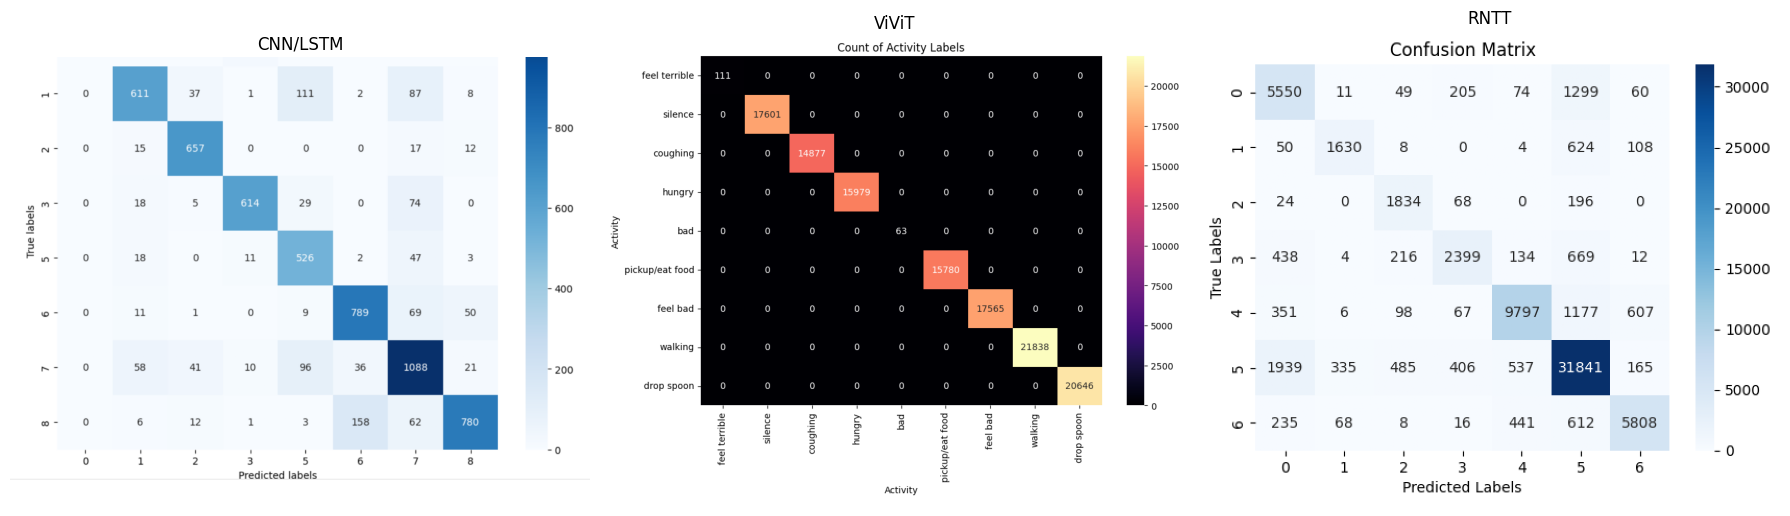

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load saved confusion matrix images
img1 = mpimg.imread('/content/drive/MyDrive/1PhD/cnnlstmCM.png')
img2 = mpimg.imread('/content/drive/MyDrive/1PhD/vivitCM.png')
img3 = mpimg.imread('/content/drive/MyDrive/1PhD/rnttCM.png')

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Display each confusion matrix image in a subplot
axes[0].imshow(img1)
axes[0].axis('off')  # Hide axes for a cleaner look
axes[0].set_title('CNN/LSTM')

axes[1].imshow(img2)
axes[1].axis('off')
axes[1].set_title('ViViT')

axes[2].imshow(img3)
axes[2].axis('off')
axes[2].set_title('RNTT')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you already have trained the model and test data
# Here X_test is your test data, and y_test are the true labels

# Get the predicted labels from the model
y_pred_probs = model.predict(X_test)  # Get probability predictions
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions

# Convert one-hot encoded y_test to class labels if necessary
y_true = np.argmax(y_test, axis=1)  # Ensure y_test is not one-hot encoded

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the label names for each class
label_names = ['coughing', 'hungry', 'feel bad', 'pickup/eat food', 'drop spoon', 'silence', 'walking']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=label_names, yticklabels=label_names)

# Add labels and title
plt.title('Confusion Matrix for ViViT Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


ValueError: multiclass-multioutput is not supported

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


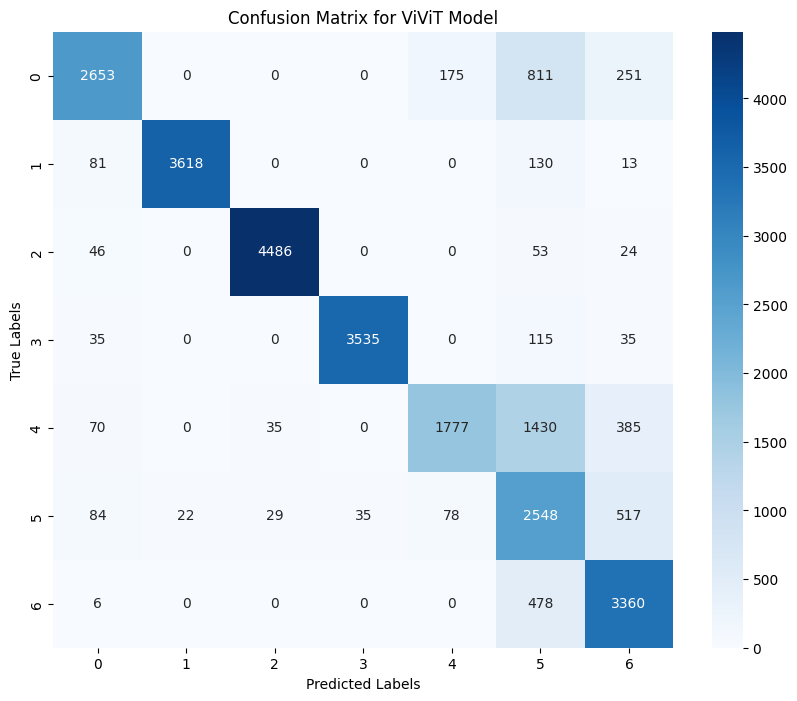

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you already have trained the model and test data
# Here X_test is your test data, and y_test are the true labels

# Get the predicted labels from the model
y_pred_probs = model.predict(X_test)  # Get probability predictions

# Convert probabilities to class predictions for each timestep
y_pred = np.argmax(y_pred_probs, axis=2)

# Convert one-hot encoded y_test to class labels if necessary
y_true = np.argmax(y_test, axis=2)  # Ensure y_test is not one-hot encoded

# Flatten the predictions and true labels to have one label per sample
y_pred = y_pred.reshape(-1)
y_true = y_true.reshape(-1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the label names for each class
label_names = ['0', '1', '2', '3', '4', '5', '6']

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=label_names, yticklabels=label_names)

# Add labels and title
plt.title('Confusion Matrix for ViViT Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()

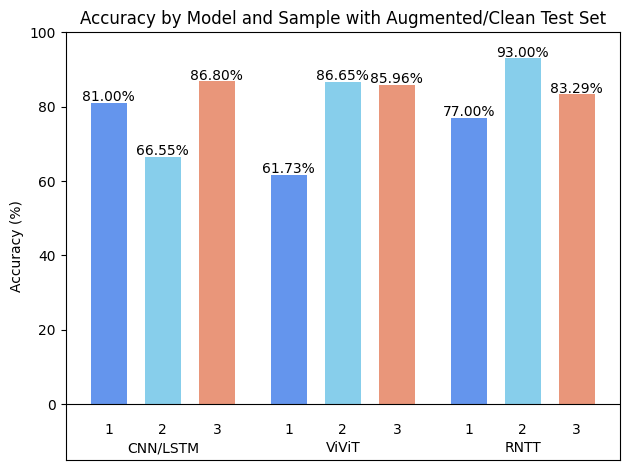

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['CNN/LSTM', 'ViViT', 'RNTT']

# Swapped values for ViViT (Clean and Augmented)
augmented = [81, 61.73, 77]  # ViViT Augmented changed to 61.73
clean = [66.55, 86.65, 93]   # ViViT Clean changed to 86.91
test = [86.80, 85.96, 83.29]

# Bar positions
x = np.arange(len(models))  # x positions for each model
width = 0.2  # Width of each bar
spacing = 0.1  # Space between bars

# Create figure and axes
fig, ax = plt.subplots()

# Set custom colors for each model, changing bars for '1' to cornflowerblue
colors = [
    ['cornflowerblue', 'skyblue', 'darksalmon'],  # CNN/LSTM
    ['cornflowerblue', 'skyblue', 'darksalmon'],  # ViViT
    ['cornflowerblue', 'skyblue', 'darksalmon'],  # RNTT
]

# Plot bars with custom colors and space between bars in each trio
for i in range(len(models)):
    ax.bar(x[i] - width - spacing, augmented[i], width,
color=colors[i][0])  # Augmented (set to cornflowerblue)
    ax.bar(x[i], clean[i], width, color=colors[i][1])
      # Clean
    ax.bar(x[i] + width + spacing, test[i], width, color=colors[i][2])
      # Test

# Add labels and title
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy by Model and Sample with Augmented/Clean Test Set')

# Set x-ticks to empty for manual placement
ax.set_xticks([])

# Add numbers under each bar group directly below the x-axis
for i in range(len(x)):
    ax.text(x[i] - width - spacing, -5, '1', ha='center', va='top')
    ax.text(x[i], -5, '2', ha='center', va='top')
    ax.text(x[i] + width + spacing, -5, '3', ha='center', va='top')

# Add model names below the numbers (adjusted vertical position)
for i in range(len(x)):
    ax.text(x[i], -10, models[i], ha='center', va='top')  # Moved up a tiny bit

# Show data labels on the bars
for i in range(len(x)):
    ax.text(x[i] - width - spacing, augmented[i] + 0.5,
f'{augmented[i]:.2f}%', ha='center')
    ax.text(x[i], clean[i] + 0.5, f'{clean[i]:.2f}%', ha='center')
    ax.text(x[i] + width + spacing, test[i] + 0.5, f'{test[i]:.2f}%',
ha='center')

# Adjust plot limits to start the x-axis from 0
plt.ylim(-15, 100)  # Extend the y-axis to make space for the numbers and labels
plt.axhline(0, color='black', linewidth=0.8)  # Draw the x-axis line
plt.grid(False)  # Disable the grid
plt.tight_layout()  # Make sure everything fits without overlapping
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Shape of y_true: (769, 7)
Shape of y_pred: (769, 7)


<ipython-input-45-65124fd50bab>:30: RuntimeWarning: invalid value encountered in divide
  cm_correct_percentage = np.diag(cm) / np.sum(cm, axis=1) * 100  # Calculate percentage for diagonal


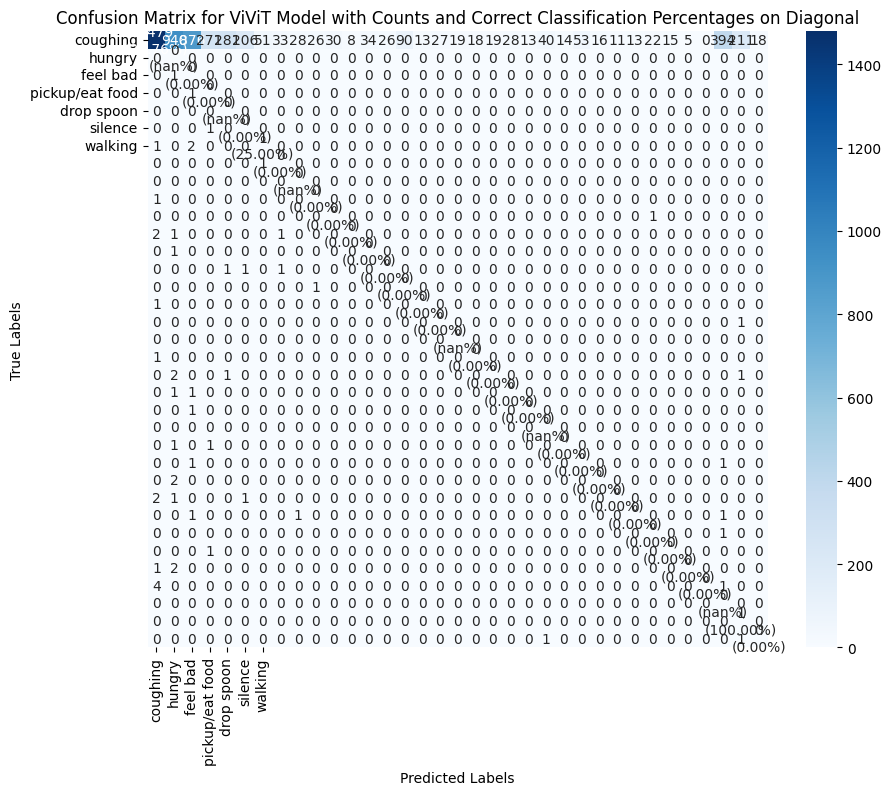

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you already have trained the model and test data
# Here X_test is your test data, and y_test are the true labels

# Get the predicted labels from the model
y_pred_probs = model.predict(X_test)  # Get probability predictions
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class predictions

# Convert one-hot encoded y_test to class labels if necessary
y_true = np.argmax(y_test, axis=1)  # Ensure y_test is not one-hot encoded

# Check the shape of y_true and y_pred
print(f"Shape of y_true: {y_true.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

# If y_true or y_pred have more than one dimension, flatten them
if len(y_true.shape) > 1:
    y_true = y_true.flatten()
if len(y_pred.shape) > 1:
    y_pred = y_pred.flatten()

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate the percentage of correctly classified samples for each class (diagonal)
cm_correct_percentage = np.diag(cm) / np.sum(cm, axis=1) * 100  # Calculate percentage for diagonal

# Now format the confusion matrix to keep the counts but display percentages only on the diagonal
annot_matrix = cm.astype(str)

for i in range(len(cm)):
    annot_matrix[i, i] = f"{cm[i, i]}\n({cm_correct_percentage[i]:.2f}%)"  # Add percentage to diagonal cells

# Define the label names for each class
label_names = ['coughing', 'hungry', 'feel bad', 'pickup/eat food', 'drop spoon', 'silence', 'walking']

# Plot the confusion matrix with sample counts and diagonal percentages
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=annot_matrix, fmt='', cmap='Blues', cbar=True, xticklabels=label_names, yticklabels=label_names)

# Add labels and title
plt.title('Confusion Matrix for ViViT Model with Counts and Correct Classification Percentages on Diagonal')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


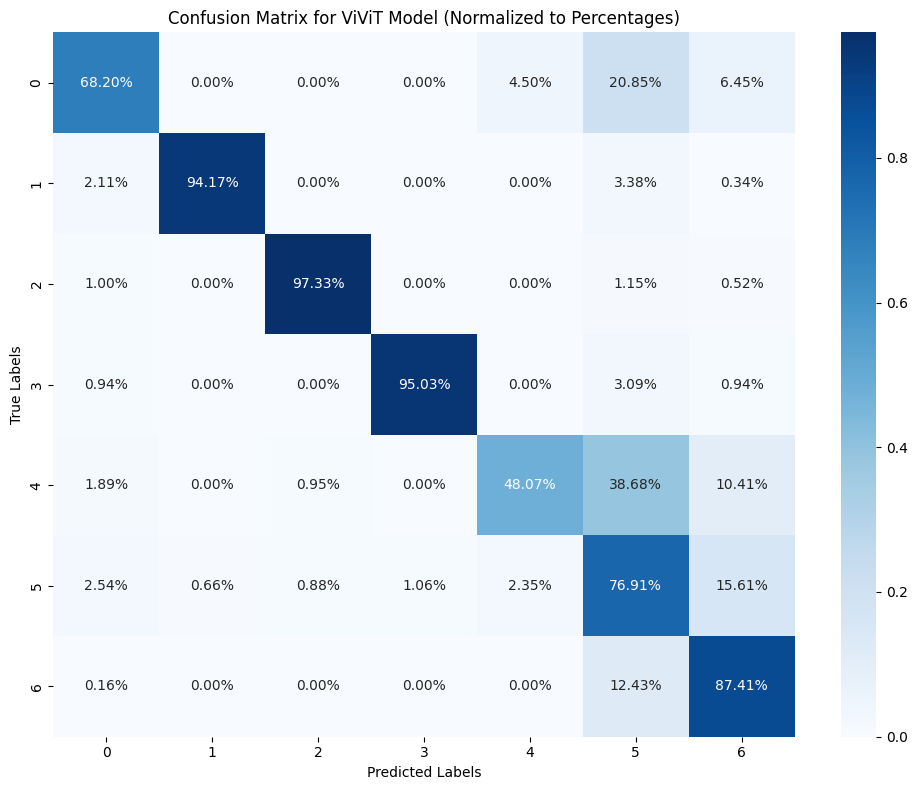

Number of samples per class: [3890 3842 4609 3720 3697 3313 3844]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you already have trained the model and test data
# Here X_test is your test data, and y_test are the true labels

# Get the predicted labels from the model
y_pred_probs = model.predict(X_test)  # Get probability predictions

# Convert probabilities to class predictions for each timestep
y_pred = np.argmax(y_pred_probs, axis=2)

# Convert one-hot encoded y_test to class labels if necessary
y_true = np.argmax(y_test, axis=2)  # Ensure y_test is not one-hot encoded

# Flatten the predictions and true labels to have one label per sample
y_pred = y_pred.reshape(-1)
y_true = y_true.reshape(-1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Sum of elements in each row gives the total number of samples for each class
samples_per_class = np.sum(cm, axis=1)

# Normalize the confusion matrix by dividing each element by the sum of its row
cm_normalized = cm.astype('float') / samples_per_class[:, np.newaxis]

# Define the label names for each class based on your encoded labels
label_names = ['0', '1', '2', '3', '4', '5', '6']

# Plot the normalized confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', cbar=True, xticklabels=label_names, yticklabels=label_names)

# Add labels and title
plt.title('Confusion Matrix for ViViT Model (Normalized to Percentages)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.tight_layout()
plt.show()

# Check the number of samples per class (if needed for validation)
print("Number of samples per class:", samples_per_class)


In [ ]:
print("Unique values in y_true:", np.unique(y_true))
print("Unique values in y_pred:", np.unique(y_pred))


Unique values in y_true: [ 0  2  3  5  6  7  9 10 11 12 13 14 15 16 18 19 20 21 23 24 25 26 27 28
 29 30 31 33 34]
Unique values in y_pred: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32 33 34]


In [ ]:
y_pred.shape

(5383,)

In [ ]:
y_test.shape

(769, 35, 7)

In [ ]:
import numpy as np

# Define the valid class labels (0 to 6)
valid_labels = [0, 1, 2, 3, 4, 5, 6]

# Filter y_true and y_pred to only include samples with valid labels
mask = np.isin(y_true, valid_labels)
y_true_filtered = y_true[mask]
y_pred_filtered = y_pred[mask]

# Filter y_pred to only keep the corresponding valid entries
y_pred_filtered = y_pred[mask]

# Check the unique values after filtering
print("Filtered y_true:", np.unique(y_true_filtered))
print("Filtered y_pred:", np.unique(y_pred_filtered))


Filtered y_true: [0 2 3 5 6]
Filtered y_pred: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32 33 34]


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


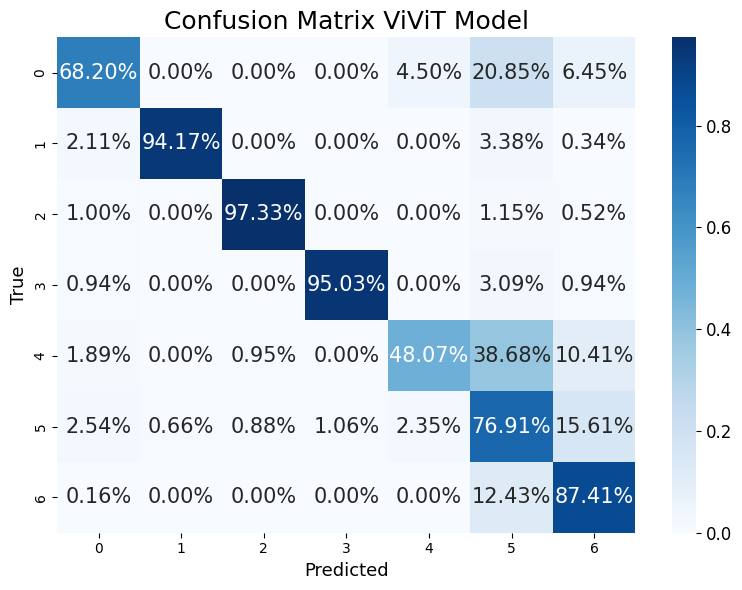

Number of samples per class: [3890 3842 4609 3720 3697 3313 3844]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you already have trained the model and test data
# Here X_test is your test data, and y_test are the true labels

# Get the predicted labels from the model
y_pred_probs = model.predict(X_test)  # Get probability predictions

# Convert probabilities to class predictions for each timestep
y_pred = np.argmax(y_pred_probs, axis=2)

# Convert one-hot encoded y_test to class labels if necessary
y_true = np.argmax(y_test, axis=2)  # Ensure y_test is not one-hot encoded

# Flatten the predictions and true labels to have one label per sample
y_pred = y_pred.reshape(-1)
y_true = y_true.reshape(-1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Sum of elements in each row gives the total number of samples for each class
samples_per_class = np.sum(cm, axis=1)

# Normalize the confusion matrix by dividing each element by the sum of its row
cm_normalized = cm.astype('float') / samples_per_class[:, np.newaxis]

# Define the label names for each class based on your encoded labels
label_names = ['0', '1', '2', '3', '4', '5', '6']

# Plot the normalized confusion matrix with percentages
plt.figure(figsize=(8, 6))

# Change the colormap to something similar to the example (purple to yellow)
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', cbar=True, xticklabels=label_names, yticklabels=label_names, annot_kws={"size": 15})

# Add labels and title
plt.title('Confusion Matrix ViViT Model', fontsize=18)
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('True', fontsize=13)

# Adjust color bar and ticks
cbar = plt.gcf().axes[-1]  # Access the color bar
cbar.tick_params(labelsize=12)  # Make color bar ticks larger

# Show the plot
plt.tight_layout()
plt.show()

# Check the number of samples per class (if needed for validation)
print("Number of samples per class:", samples_per_class)


In [ ]:
unique, counts = np.unique(y_true_filtered, return_counts=True)
print("Class distribution in y_true:", dict(zip(unique, counts)))

Class distribution in y_true: {0: 5328, 2: 1, 3: 1, 5: 1, 6: 4}


In [ ]:
unique_pred, counts_pred = np.unique(y_pred_filtered, return_counts=True)
print("Class distribution in y_pred:", dict(zip(unique_pred, counts_pred)))

Class distribution in y_pred: {0: 1480, 1: 941, 2: 879, 3: 272, 4: 281, 5: 206, 6: 52, 7: 33, 8: 28, 9: 26, 10: 30, 11: 8, 12: 34, 13: 26, 14: 90, 15: 13, 16: 27, 17: 19, 18: 18, 19: 19, 20: 28, 21: 13, 22: 40, 23: 14, 24: 53, 25: 16, 26: 11, 27: 13, 28: 22, 29: 15, 30: 5, 32: 394, 33: 211, 34: 18}
